In [ ]:
pip install requests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy.stats.mstats import winsorize
from random import seed
from random import random
import seaborn as sns
from IPython.display import display

In [ ]:
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

## conditional

In [ ]:
currencies = ['eth', 'btc', 'doge', 'bnb', 'ada']

string = ['no', 'low', 'medium-low', 'medium-high']
fee_spot_lst = [0.0, 0.00015, 0.000375, 0.000525]
fee_perp_lst = [0.0, 0.0, 0.000054, 0.000108]

fee_spot = fee_spot_lst[1]
fee_perp = fee_perp_lst[1]

threshold_lst = list(np.arange(.0,1.0,0.05))
threshold = threshold_lst[9]

notional = 1000000.0

plot = False #if one doesnt want to plot figures within strategy.ipynb

In [ ]:
%run perpetual_restart_strategy.ipynb
two = results_pretty
%run perpetual_restart_strategy_one.ipynb
one = results_pretty

In [ ]:
index = pd.MultiIndex.from_product([['eth', 'btc', 'doge', 'bnb', 'ada'], ['ann_return', 'ann_std', 'ann_sharpe', 'ann_sharpe_ar1']])

cols = pd.MultiIndex.from_product([['non-conditional', 'conditional'], ['2019', '2020', '2021', '2022', 'all']]) 

data=[list(two.loc[('eth', 'ann_return')]) +  list(one.loc[('eth', 'ann_return')]),
      list(two.loc[('eth', 'ann_std')]) +  list(one.loc[('eth', 'ann_std')]),
      list(two.loc[('eth', 'ann_sharpe')]) +  list(one.loc[('eth', 'ann_sharpe')]),
      list(two.loc[('eth', 'ann_sharpe_ar1')]) +  list(one.loc[('eth', 'ann_sharpe_ar1')]),
      list(two.loc[('btc', 'ann_return')]) +  list(one.loc[('btc', 'ann_return')]),
      list(two.loc[('btc', 'ann_std')]) +  list(one.loc[('btc', 'ann_std')]),
      list(two.loc[('btc', 'ann_sharpe')]) +  list(one.loc[('btc', 'ann_sharpe')]),
      list(two.loc[('btc', 'ann_sharpe_ar1')]) +  list(one.loc[('btc', 'ann_sharpe_ar1')]),
      list(two.loc[('doge', 'ann_return')]) +  list(one.loc[('doge', 'ann_return')]),
      list(two.loc[('doge', 'ann_std')]) +  list(one.loc[('doge', 'ann_std')]),
      list(two.loc[('doge', 'ann_sharpe')]) +  list(one.loc[('doge', 'ann_sharpe')]),
      list(two.loc[('doge', 'ann_sharpe_ar1')]) +  list(one.loc[('doge', 'ann_sharpe_ar1')]),
      list(two.loc[('bnb', 'ann_return')]) +  list(one.loc[('bnb', 'ann_return')]),
      list(two.loc[('bnb', 'ann_std')]) +  list(one.loc[('bnb', 'ann_std')]),
      list(two.loc[('bnb', 'ann_sharpe')]) +  list(one.loc[('bnb', 'ann_sharpe')]),
      list(two.loc[('bnb', 'ann_sharpe_ar1')]) +  list(one.loc[('bnb', 'ann_sharpe_ar1')]),
      list(two.loc[('ada', 'ann_return')]) +  list(one.loc[('ada', 'ann_return')]),
      list(two.loc[('ada', 'ann_std')]) +  list(one.loc[('ada', 'ann_std')]),
      list(two.loc[('ada', 'ann_sharpe')]) +  list(one.loc[('ada', 'ann_sharpe')]),
      list(two.loc[('ada', 'ann_sharpe_ar1')]) +  list(one.loc[('ada', 'ann_sharpe_ar1')]),
     ]

df = pd.DataFrame(data, columns=cols,index=index)

display(df)

## iterating fees

In [ ]:
currencies = ['eth', 'btc', 'doge', 'bnb', 'ada']

string = ['no', 'low', 'medium-low', 'medium-high']
fee_spot_lst = [0.0, 0.00015, 0.000375, 0.000525]
fee_perp_lst = [0.0, 0.0, 0.000054, 0.000108]

threshold_lst = list(np.arange(.0,1.0,0.05))
threshold = threshold_lst[9]

notional = 1000000.0

plot = False #if one doesnt want to plot figures within strategy.ipynb

In [ ]:
#iterating fees
df_trading_all = []
results_all = []

for l in range(0, len(fee_spot_lst)):
    fee_spot = fee_spot_lst[l]
    fee_perp = fee_perp_lst[l]
    %run perpetual_restart_strategy.ipynb
    df_trading_all.append(df)
    results_all.append(results)

    print('')
    print(f'fee {string[l]}')
    display(results_all[l][['ann_return', 'ann_std', 'ann_sharpe', 'ann_sharpe_ar1']])

In [ ]:
#unpack result table; 0 = low fees; unpack only the forth value -> mean
ret_no = [np.round(item,4) for sublist in [results_all[0][4::5]['ann_return']] for item in sublist]
ret_low = [np.round(item,4) for sublist in [results_all[1][4::5]['ann_return']] for item in sublist]
ret_mlow = [np.round(item,4) for sublist in [results_all[2][4::5]['ann_return']] for item in sublist]
ret_mhigh = [np.round(item,4) for sublist in [results_all[3][4::5]['ann_return']] for item in sublist]

st_no = ['(' + str(np.round(item,4))+ ')' for sublist in [results_all[0][4::5]['ann_std']] for item in sublist]
st_low = ['(' + str(np.round(item,4))+ ')' for sublist in [results_all[1][4::5]['ann_std']] for item in sublist]
st_mlow = ['(' + str(np.round(item,4))+ ')' for sublist in [results_all[2][4::5]['ann_std']] for item in sublist]
st_mhigh = ['(' + str(np.round(item,4))+ ')' for sublist in [results_all[3][4::5]['ann_std']] for item in sublist]

sh_no = [np.round(item,2) for sublist in [results_all[0][4::5]['ann_sharpe']] for item in sublist]
sh_low = [np.round(item,2) for sublist in [results_all[1][4::5]['ann_sharpe']] for item in sublist]
sh_mlow = [np.round(item,2) for sublist in [results_all[2][4::5]['ann_sharpe']] for item in sublist]
sh_mhigh = [np.round(item,2) for sublist in [results_all[3][4::5]['ann_sharpe']] for item in sublist]

In [ ]:
#table as in Du 2018

iterables = [currencies, ['ann_return', 'ann_std', 'ann_sharpe']]

index = pd.MultiIndex.from_product(iterables)

results_pretty = pd.DataFrame(
    {'no': [item for sublist in list(zip(ret_no, st_no, sh_no)) for item in sublist],
     'low': [item for sublist in list(zip(ret_low, st_low, sh_low)) for item in sublist],
     'medium-low': [item for sublist in list(zip(ret_mlow, st_mlow, sh_mlow)) for item in sublist],
     'medium-high': [item for sublist in list(zip(ret_mhigh, st_mhigh, sh_mhigh)) for item in sublist]}, index)

results_pretty = results_pretty.dropna(axis=0) #drop years without data

def highlight_cols(s):
    color = 'lightgrey'
    return 'background-color: %s' % color

results_pretty = results_pretty.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['low']])

results_pretty

## iterating threshold and fees

In [2]:
currencies = ['eth', 'btc', 'doge', 'bnb', 'ada']

string = ['no', 'low', 'medium-low', 'medium-high']
fee_spot_lst = [0.0, 0.00015, 0.000375, 0.000525]
fee_perp_lst = [0.0, 0.0, 0.000054, 0.000108]

threshold_lst = list(np.arange(.0,1.0,0.1))

notional = 1000000.0

plot = False

In [3]:
#iterating thresholds
df_trading_all = []
results_all = []

counter = 0

for l in range(0, len(threshold_lst)):
    threshold = threshold_lst[l]
    
    for k in range(0, len(fee_spot_lst)):
        fee_spot = fee_spot_lst[k]
        fee_perp = fee_perp_lst[k]
        %run perpetual_restart_strategy.ipynb
        df_trading_all.append(df)
        results_all.append(results)
        
        print('')
        print(counter)
        print(f'threshold: {threshold_lst[l]}, fee: {string[k]}')
        display(results_all[counter][['ann_return', 'ann_std', 'ann_sharpe', 'ann_sharpe_ar1', 'fees', 'trades', 'turnover']])
        
        counter += 1
        


eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded


/opt/conda/envs/python3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and w


0
threshold: 0.0, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.181364  0.189307      0.6949        0.756098   0.0      67   
     2020    0.411357  0.056980      6.3941        6.351630   0.0    1001   
     2021    0.402753  0.061338      6.0903        6.551184   0.0     829   
     2022    0.036910  0.015872      1.2137        0.996750   0.0      92   
     mean    0.337367  0.064737      4.6680        4.889066   0.0     497   
btc  2019    0.086057  0.011920      3.0409        3.237024   0.0      43   
     2020    0.214699  0.033718      4.9730        5.810327   0.0     687   
     2021    0.309338  0.065572      4.2725        4.584654   0.0     653   
     2022    0.036766  0.010867      1.7595        1.871705   0.0     162   
     mean    0.218094  0.046802      3.9084        4.260763   0.0     386   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.203033  0.114707     18.8297       16.140155   0.0    1188   
     2021    1.083657  0.095751     11.0127       13.660341   0.0    1347   
     2022    1.005296  0.030526     32.3544       36.457394   0.0    1010   
     mean    1.349289  0.091639     14.3946       14.829524   0.0     886   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.829909  0.054817     14.2951       17.846979   0.0    1135   
     2021    0.781889  0.053786     13.9944       17.610462   0.0    1172   
     2022    0.242255  0.024345      9.2261       11.197536   0.0     297   
     mean    0.703359  0.050274     13.3197       16.609112   0.0     651   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.917581  0.057531     15.1404       19.490691   0.0    1532   
     2021    0.677656  0.076905      8.4321        8.353613   0.0    1137   
     2022    0.978720  0.032112     29.9288       33.453955   0.0     838   
     mean    0.825693  0.063418     12.4842       13.341675   0.0     876   

           turnover  
eth  2019       133  
     2020      2549  
     2021      3407  
     2022       421  
     mean      1627  
btc  2019        84  
     2020      1571  
     2021      2028  
     2022       554  
     mean      1059  
doge 2019         0  
     2020      4276  
     2021     16525  
     2022     20699  
     mean     10375  
bnb  2019         0  
     2020      3394  
     2021      8291  
     2022      2840  
     mean      3631  
ada  2019         0  
     2020      4983  
     2021      8082  
     2022      9409  
     mean      5618

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

1
threshold: 0.0, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.076278  0.189171      0.1399        0.151820   10029.5385   
     2020    0.261671  0.056940      3.7698        3.745162  175032.7391   
     2021    0.278322  0.061563      4.0469        4.341985  204282.0430   
     2022    0.003605  0.015344     -0.9151       -0.758096   23668.1103   
     mean    0.218646  0.064764      2.8329        2.966823  103253.1077   
btc  2019    0.019172  0.011020     -2.7802       -3.305532    6364.4712   
     2020    0.112092  0.033742      1.9285        2.238899  110967.8893   
     2021    0.211453  0.065779      2.7709        2.955599  129593.4342   
     2022   -0.021783  0.010188     -3.8701       -4.489251   33402.8289   
     mean    0.125997  0.046888      1.9370        2.100951   70082.1559   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.830275  0.112977     15.8186       13.572112  289853.5136   
     2021    0.881186  0.095143      8.9550       11.219613  926289.9102   
     2022    0.640293  0.027618     22.5450       29.057560  979504.5678   
     mean    1.068159  0.090526     11.4661       11.910421  548911.9979   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.639324  0.053994     10.9832       14.034329  231798.5731   
     2021    0.606077  0.053219     10.8400       13.806871  476096.9826   
     2022    0.134944  0.024127      4.8617        6.022387  147410.1006   
     mean    0.534161  0.049632     10.0829       12.802084  213826.4141   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.667915  0.056623     10.9739       14.518223  328794.5172   
     2021    0.507036  0.076705      6.2297        6.178720  439354.2377   
     2022    0.675779  0.029078     22.6334       28.723781  442621.5266   
     mean    0.600409  0.062719      9.0314        9.746132  302692.5704   

           trades  turnover  
eth  2019      67       132  
     2020    1001      2334  
     2021     829      2722  
     2022      92       315  
     mean     497      1376  
btc  2019      43        84  
     2020     687      1481  
     2021     653      1729  
     2022     162       445  
     mean     386       935  
doge 2019       0         0  
     2020    1188      3861  
     2021    1347     12334  
     2022    1010     13061  
     mean     886      7314  
bnb  2019       0         0  
     2020    1135      3092  
     2021    1172      6349  
     2022     297      1965  
     mean     651      2851  
ada  2019       0         0  
     2020    1532      4386  
     2021    1137      5857  
     2022     838      5900  
     mean     876      4036

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

2
threshold: 0.0, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.119071  0.189126     -0.8930       -0.972308  2.841138e+04   
     2020   -0.016773  0.057752     -1.1046       -1.084252  4.271443e+05   
     2021    0.046968  0.062677      0.2837        0.299678  3.860926e+05   
     2022   -0.058301  0.015196     -4.9978       -4.159518  3.935248e+04   
     mean   -0.002141  0.065453     -0.5701       -0.592325  2.202502e+05   
btc  2019   -0.105348  0.011549    -13.4348      -15.252214  1.810822e+04   
     2020   -0.078864  0.034882     -3.6089       -3.968555  2.852991e+05   
     2021    0.029367  0.066681      0.0027        0.000000  2.760293e+05   
     2022   -0.130671  0.011041    -13.4333      -13.974900  6.353181e+04   
     mean   -0.045357  0.047753     -1.6864       -1.787640  1.607421e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.137092  0.110651      9.8865        8.489396  6.902443e+05   
     2021    0.504862  0.094705      5.0227        6.331233  1.550390e+06   
     2022   -0.038593  0.025667     -2.1911       -3.247821  1.196184e+06   
     mean    0.545442  0.089399      5.7636        6.031711  8.592044e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.284714  0.053647      4.4442        5.706277  5.612696e+05   
     2021    0.279069  0.053291      4.6891        5.911184  8.341209e+05   
     2022   -0.064640  0.025323     -3.2495       -3.725922  2.125734e+05   
     mean    0.219407  0.049607      3.7431        4.722441  4.019910e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.203415  0.056342      2.7843        3.690092  7.505547e+05   
     2021    0.189737  0.077084      2.0828        2.059044  6.947346e+05   
     2022    0.112378  0.026202      3.6154        5.725892  5.331251e+05   
     mean    0.181368  0.062587      2.3551        2.540720  4.946036e+05   

           trades  turnover  
eth  2019      67       131  
     2020    1001      1991  
     2021     829      1798  
     2022      92       183  
     mean     497      1026  
btc  2019      43        83  
     2020     687      1331  
     2021     653      1287  
     2022     162       296  
     mean     386       749  
doge 2019       0         0  
     2020    1188      3215  
     2021    1347      7219  
     2022    1010      5576  
     mean     886      4002  
bnb  2019       0         0  
     2020    1135      2617  
     2021    1172      3889  
     2022     297       990  
     mean     651      1874  
ada  2019       0         0  
     2020    1532      3499  
     2021    1137      3238  
     2022     838      2484  
     mean     876      2305

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

3
threshold: 0.0, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.261868  0.189260     -1.6468       -1.794425  4.163585e+04   
     2020   -0.220356  0.059070     -4.5264       -4.377196  5.634888e+05   
     2021   -0.122160  0.064050     -2.3629       -2.440451  4.219951e+05   
     2022   -0.103546  0.015782     -7.6791       -6.305839  3.906118e+04   
     mean   -0.163553  0.066482     -2.9892       -3.056222  2.665452e+05   
btc  2019   -0.196428  0.013554    -18.1672      -17.598011  2.661153e+04   
     2020   -0.218502  0.036552     -7.2642       -7.552734  3.900972e+05   
     2021   -0.103770  0.067767     -1.9619       -2.027093  3.288560e+05   
     2022   -0.210275  0.013113    -17.3813      -15.774460  6.956875e+04   
     mean   -0.170652  0.048950     -4.2048       -4.347615  2.037834e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.630331  0.109722      5.3516        4.595928  8.959093e+05   
     2021    0.229795  0.094973      2.1123        2.648339  1.557014e+06   
     2022   -0.534938  0.027495    -20.0976      -25.332615  9.513221e+05   
     mean    0.163320  0.089379      1.4896        1.554889  8.510615e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.025417  0.054384     -0.3839       -0.476858  7.370250e+05   
     2021    0.039985  0.054271      0.1990        0.246576  8.646332e+05   
     2022   -0.210558  0.027374     -8.3365       -8.685705  1.901598e+05   
     mean   -0.010729  0.050555     -0.8793       -1.068220  4.479545e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.136226  0.057308     -3.1892       -4.069076  9.479721e+05   
     2021   -0.042234  0.077982     -0.9158       -0.898045  6.680213e+05   
     2022   -0.299521  0.026897    -11.7919      -17.103688  4.191506e+05   
     mean   -0.125007  0.063462     -2.5051       -2.657129  5.087860e+05   

           trades  turnover  
eth  2019      67       130  
     2020    1001      1780  
     2021     829      1332  
     2022      92       123  
     mean     497       841  
btc  2019      43        83  
     2020     687      1233  
     2021     653      1039  
     2022     162       219  
     mean     386       643  
doge 2019       0         0  
     2020    1188      2828  
     2021    1347      4913  
     2022    1010      3005  
     mean     886      2686  
bnb  2019       0         0  
     2020    1135      2328  
     2021    1172      2731  
     2022     297       600  
     mean     651      1415  
ada  2019       0         0  
     2020    1532      2995  
     2021    1137      2110  
     2022     838      1323  
     mean     876      1607

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

4
threshold: 0.1, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.194072  0.189204      0.7625        0.829006   0.0     114   
     2020    0.403198  0.043834      8.1256        8.302956   0.0    1607   
     2021    0.395579  0.057683      6.3519        6.804944   0.0    1354   
     2022    0.051546  0.015853      2.1384        1.762915   0.0     241   
     mean    0.334156  0.059051      5.0631        5.365841   0.0     829   
btc  2019    0.086584  0.011514      3.1939        3.415710   0.0      65   
     2020    0.215175  0.032410      5.1884        6.103373   0.0    1135   
     2021    0.315051  0.062609      4.5659        4.876302   0.0    1142   
     2022    0.040050  0.010198      2.1969        2.514007   0.0     333   
     mean    0.221120  0.044745      4.1557        4.522251   0.0     668   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.236006  0.113861     19.2592       16.440094   0.0    1422   
     2021    1.091274  0.094682     11.2174       13.695167   0.0    1833   
     2022    1.033856  0.028851     35.2227       40.435034   0.0    1389   
     mean    1.367904  0.090667     14.7543       15.056754   0.0    1161   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.822858  0.053482     14.5201       17.910335   0.0    1495   
     2021    0.776617  0.053013     14.0991       17.308875   0.0    1647   
     2022    0.255332  0.022867     10.3943       13.123432   0.0     512   
     mean    0.700701  0.049223     13.5501       16.633159   0.0     913   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.890302  0.055527     15.1955       19.756978   0.0    1970   
     2021    0.661525  0.074460      8.4924        8.286390   0.0    1567   
     2022    1.041527  0.030898     33.1375       36.641186   0.0    1074   
     mean    0.819208  0.061327     12.8041       13.547384   0.0    1152   

           turnover  
eth  2019       151  
     2020      2623  
     2021      3447  
     2022       585  
     mean      1701  
btc  2019        76  
     2020      1510  
     2021      2158  
     2022       637  
     mean      1095  
doge 2019         0  
     2020      4422  
     2021     16908  
     2022     21786  
     mean     10779  
bnb  2019         0  
     2020      3359  
     2021      8361  
     2022      3103  
     mean      3706  
ada  2019         0  
     2020      4716  
     2021      7697  
     2022      9649  
     mean      5515

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

5
threshold: 0.1, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019    0.074780  0.189105      0.1320        0.143526  1.138856e+04   
     2020    0.248881  0.043609      4.6289        4.734573  1.794350e+05   
     2021    0.268274  0.057803      4.1363        4.420836  2.050707e+05   
     2022    0.004703  0.015434     -0.8386       -0.696336  3.256985e+04   
     mean    0.209669  0.058994      2.9578        3.137206  1.071160e+05   
btc  2019    0.025961  0.010913     -2.1854       -2.641506  5.768385e+03   
     2020    0.116432  0.032394      2.1427        2.508069  1.069693e+05   
     2021    0.211294  0.062767      2.9014        3.087866  1.381432e+05   
     2022   -0.026780  0.009720     -4.5706       -5.522843  3.826694e+04   
     mean    0.127096  0.044802      2.0517        2.223599  7.228697e+04   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.855779  0.112223     16.1521       13.800365  2.990504e+05   
     2021    0.888338  0.094089      9.1313       11.250689  9.440275e+05   
     2022    0.660543  0.026136     24.5981       32.161192  1.024815e+06   
     mean    1.082819  0.089609     11.7470       12.081411  5.669733e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.634301  0.052671     11.1637       14.078114  2.296490e+05   
     2021    0.598102  0.052446     10.8477       13.480369  4.803224e+05   
     2022    0.137187  0.022573      5.2958        6.842391  1.605311e+05   
     mean    0.529165  0.048581     10.1982       12.737100  2.176256e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.651080  0.054724     11.0471       14.745193  3.130155e+05   
     2021    0.493140  0.074225      6.2507        6.111969  4.230734e+05   
     2022    0.721968  0.027908     25.2373       31.363452  4.574983e+05   
     mean    0.596040  0.060650      9.2675        9.898477  2.983968e+05   

           trades  turnover  
eth  2019     114       150  
     2020    1607      2393  
     2021    1354      2733  
     2022     241       432  
     mean     829      1427  
btc  2019      65        76  
     2020    1135      1428  
     2021    1142      1842  
     2022     333       510  
     mean     668       964  
doge 2019       0         0  
     2020    1422      3984  
     2021    1833     12569  
     2022    1389     13664  
     mean    1161      7554  
bnb  2019       0         0  
     2020    1495      3064  
     2021    1647      6405  
     2022     512      2140  
     mean     913      2902  
ada  2019       0         0  
     2020    1970      4176  
     2021    1567      5639  
     2022    1074      6098  
     mean    1152      3978

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

6
threshold: 0.1, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.146975  0.189091     -1.0407       -1.134755  3.222205e+04   
     2020   -0.038202  0.044018     -1.9361       -1.955585  4.350486e+05   
     2021    0.031514  0.058529      0.0398        0.040302  3.823389e+05   
     2022   -0.082395  0.015295     -6.5408       -5.484100  5.299951e+04   
     mean   -0.021877  0.059384     -0.9607       -1.012182  2.256523e+05   
btc  2019   -0.086887  0.011102    -12.3128      -15.102544  1.641922e+04   
     2020   -0.067332  0.033041     -3.4609       -3.902371  2.762749e+05   
     2021    0.018283  0.063426     -0.1719       -0.180554  2.951111e+05   
     2022   -0.151105  0.010297    -16.3884      -17.812198  7.237455e+04   
     mean   -0.047844  0.045375     -1.8296       -1.948670  1.650449e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.148660  0.109974     10.0526        8.596973  7.095197e+05   
     2021    0.511146  0.093533      5.1529        6.389821  1.568366e+06   
     2022   -0.033819  0.023818     -2.1608       -3.347578  1.237823e+06   
     mean    0.552729  0.088421      5.9098        6.121279  8.789273e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.283442  0.052127      4.5494        5.793055  5.570038e+05   
     2021    0.266054  0.052287      4.5302        5.594897  8.424875e+05   
     2022   -0.082566  0.023321     -4.2971       -5.135868  2.301565e+05   
     mean    0.210049  0.048326      3.6486        4.547900  4.074120e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.205990  0.054345      2.9340        3.930957  7.215480e+05   
     2021    0.179996  0.074377      2.0277        1.977418  6.825789e+05   
     2022    0.127645  0.024852      4.4262        6.762456  5.594587e+05   
     mean    0.180926  0.060351      2.4350        2.607529  4.908964e+05   

           trades  turnover  
eth  2019     114       149  
     2020    1607      2028  
     2021    1354      1782  
     2022     241       245  
     mean     829      1051  
btc  2019      65        75  
     2020    1135      1289  
     2021    1142      1376  
     2022     333       337  
     mean     668       769  
doge 2019       0         0  
     2020    1422      3305  
     2021    1833      7302  
     2022    1389      5770  
     mean    1161      4094  
bnb  2019       0         0  
     2020    1495      2597  
     2021    1647      3927  
     2022     512      1072  
     mean     913      1899  
ada  2019       0         0  
     2020    1970      3364  
     2021    1567      3181  
     2022    1074      2607  
     mean    1152      2288

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

7
threshold: 0.1, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.309080  0.189213     -1.8968       -2.066973  4.717793e+04   
     2020   -0.248120  0.044996     -6.5592       -6.475235  5.713305e+05   
     2021   -0.141588  0.059472     -2.8715       -2.980043  4.137803e+05   
     2022   -0.146070  0.015726    -10.4105       -8.662973  5.178276e+04   
     mean   -0.191175  0.060079     -3.7675       -3.921088  2.710179e+05   
btc  2019   -0.169415  0.012271    -17.8653      -19.007190  2.413805e+04   
     2020   -0.201722  0.034048     -7.3056       -7.903561  3.789734e+05   
     2021   -0.122845  0.064215     -2.3675       -2.454834  3.524347e+05   
     2022   -0.242009  0.011775    -22.0514      -20.961929  7.892642e+04   
     mean   -0.175768  0.046175     -4.5683       -4.771755  2.086182e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.631688  0.109019      5.3986        4.618022  9.186272e+05   
     2021    0.235436  0.093596      2.2036        2.722186  1.566580e+06   
     2022   -0.541497  0.024819    -22.5288      -30.366681  9.767467e+05   
     mean    0.165203  0.088217      1.5306        1.585827  8.654884e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.026875  0.052546     -0.3696       -0.456640  7.322382e+05   
     2021    0.023275  0.052916     -0.1117       -0.133350  8.741839e+05   
     2022   -0.243237  0.024853    -10.4970      -11.307916  2.050323e+05   
     mean   -0.023288  0.048922     -1.1654       -1.416183  4.528636e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.119472  0.054996     -3.0186       -3.913845  9.171521e+05   
     2021   -0.048945  0.074981     -1.0420       -1.009261  6.659756e+05   
     2022   -0.306873  0.025225    -12.8650      -18.236464  4.449021e+05   
     mean   -0.122589  0.060935     -2.5693       -2.713580  5.070075e+05   

           trades  turnover  
eth  2019     114       147  
     2020    1607      1805  
     2021    1354      1306  
     2022     241       162  
     mean     829       855  
btc  2019      65        75  
     2020    1135      1198  
     2021    1142      1113  
     2022     333       249  
     mean     668       659  
doge 2019       0         0  
     2020    1422      2900  
     2021    1833      4943  
     2022    1389      3085  
     mean    1161      2732  
bnb  2019       0         0  
     2020    1495      2313  
     2021    1647      2762  
     2022     512       647  
     mean     913      1430  
ada  2019       0         0  
     2020    1970      2897  
     2021    1567      2103  
     2022    1074      1405  
     mean    1152      1601

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

8
threshold: 0.2, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.227776  0.189052      0.9414        1.024152   0.0     179   
     2020    0.396089  0.041998      8.3116        8.427819   0.0    1843   
     2021    0.392535  0.050334      7.2188        7.700508   0.0    1603   
     2022    0.083707  0.015561      4.2453        3.468147   0.0     472   
     mean    0.336696  0.055716      5.4117        5.719810   0.0    1024   
btc  2019    0.098619  0.011110      4.3932        4.830747   0.0      87   
     2020    0.220756  0.031271      5.5558        6.716236   0.0    1285   
     2021    0.325054  0.061567      4.8057        5.127494   0.0    1417   
     2022    0.066097  0.009533      5.0825        5.835742   0.0     539   
     mean    0.232086  0.043807      4.4950        4.906794   0.0     832   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.220826  0.113376     19.2077       16.371558   0.0    1541   
     2021    1.076845  0.092945     11.2718       13.503520   0.0    2101   
     2022    0.996238  0.027343     35.7895       42.178980   0.0    1533   
     mean    1.348201  0.089455     14.7339       14.876354   0.0    1293   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.814723  0.052114     14.7451       18.336636   0.0    1755   
     2021    0.784847  0.051061     14.7992       17.531870   0.0    1992   
     2022    0.276280  0.022400     11.5462       14.604248   0.0     671   
     mean    0.704891  0.047695     14.0720       17.027311   0.0    1104   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.895694  0.053674     15.8206       20.410724   0.0    2254   
     2021    0.670550  0.070283      9.1255        9.031437   0.0    1923   
     2022    1.018991  0.029288     34.1896       37.683770   0.0    1275   
     mean    0.821190  0.058351     13.4911       14.439566   0.0    1363   

           turnover  
eth  2019       186  
     2020      2574  
     2021      3462  
     2022      1075  
     mean      1824  
btc  2019        88  
     2020      1543  
     2021      2346  
     2022       956  
     mean      1233  
doge 2019         0  
     2020      4371  
     2021     16250  
     2022     20114  
     mean     10184  
bnb  2019         0  
     2020      3363  
     2021      8475  
     2022      3470  
     mean      3827  
ada  2019         0  
     2020      4782  
     2021      8183  
     2022      9549  
     mean      5628

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

9
threshold: 0.2, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.081629  0.188992      0.1684        0.182996   13950.9985   
     2020    0.245220  0.041840      4.7371        4.806592  175931.2977   
     2021    0.263439  0.050470      4.6415        4.945354  205941.2634   
     2022   -0.002159  0.015150     -1.3073       -1.076653   59202.6269   
     mean    0.205409  0.055687      3.0570        3.236071  113756.5466   
btc  2019    0.028537  0.010548     -2.0168       -2.440263    6668.5956   
     2020    0.120229  0.031256      2.3422        2.812520  109047.9529   
     2021    0.213719  0.061742      2.9888        3.178728  149209.2683   
     2022   -0.031973  0.009136     -5.4312       -6.554506   56444.7711   
     mean    0.128816  0.043880      2.1340        2.320748   80342.6470   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.842783  0.111809     16.0957       13.730921  295825.3844   
     2021    0.877226  0.092400      9.1779       11.082117  909689.8192   
     2022    0.642260  0.024943     25.0417       33.482066  954862.6507   
     mean    1.069659  0.088469     11.7496       11.942193  540094.4636   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.624476  0.051316     11.2671       14.318752  229740.5032   
     2021    0.603672  0.050489     11.3785       13.628499  485317.7972   
     2022    0.145146  0.022172      5.7505        7.391577  178276.3360   
     mean    0.529212  0.047064     10.5279       12.946986  223333.6591   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.653366  0.052838     11.4847       15.228100  316793.2571   
     2021    0.493200  0.070071      6.6221        6.563484  446245.2701   
     2022    0.705888  0.026611     25.8631       31.955948  448190.6325   
     mean    0.594107  0.057699      9.7079       10.496643  302807.2899   

           trades  turnover  
eth  2019     179       184  
     2020    1843      2346  
     2021    1603      2745  
     2022     472       787  
     mean    1024      1516  
btc  2019      87        88  
     2020    1285      1456  
     2021    1417      1990  
     2022     539       752  
     mean     832      1071  
doge 2019       0         0  
     2020    1541      3941  
     2021    2101     12117  
     2022    1533     12726  
     mean    1293      7196  
bnb  2019       0         0  
     2020    1755      3065  
     2021    1992      6473  
     2022     671      2377  
     mean    1104      2979  
ada  2019       0         0  
     2020    2254      4226  
     2021    1923      5949  
     2022    1275      5973  
     mean    1363      4037

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

10
threshold: 0.2, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.190074  0.189013     -1.2691       -1.384518  3.937739e+04   
     2020   -0.035460  0.042195     -1.9547       -1.957526  4.258402e+05   
     2021    0.023333  0.051179     -0.1143       -0.120544  3.839718e+05   
     2022   -0.161843  0.015378    -11.6718       -9.534019  9.476445e+04   
     mean   -0.038795  0.056058     -1.3195       -1.385189  2.359884e+05   
btc  2019   -0.101906  0.010707    -14.1698      -17.340711  1.896475e+04   
     2020   -0.066865  0.031819     -3.5792       -4.148337  2.806841e+05   
     2021    0.006609  0.062371     -0.3619       -0.381015  3.149282e+05   
     2022   -0.214412  0.010177    -22.8022      -23.644325  1.034971e+05   
     mean   -0.063330  0.044429     -2.2171       -2.373990  1.795186e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.139730  0.109624     10.0032        8.539942  7.027086e+05   
     2021    0.506135  0.091841      5.1932        6.314396  1.519439e+06   
     2022   -0.016149  0.022698     -1.4889       -2.407822  1.171430e+06   
     mean    0.551701  0.087298      5.9740        6.115926  8.483943e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.270473  0.050669      4.4243        5.686106  5.564323e+05   
     2021    0.266639  0.050179      4.7322        5.663732  8.467211e+05   
     2022   -0.098787  0.022863     -5.0926       -6.157763  2.523725e+05   
     mean    0.202369  0.046692      3.6118        4.448676  4.138815e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.202494  0.052285      2.9828        4.007568  7.280996e+05   
     2021    0.163349  0.070215      1.9108        1.890356  7.101663e+05   
     2022    0.123602  0.023690      4.4726        6.919091  5.375202e+05   
     mean    0.171699  0.057341      2.4019        2.600258  4.939465e+05   

           trades  turnover  
eth  2019     179       182  
     2020    1843      1985  
     2021    1603      1789  
     2022     472       440  
     mean    1024      1099  
btc  2019      87        87  
     2020    1285      1309  
     2021    1417      1468  
     2022     539       482  
     mean     832       837  
doge 2019       0         0  
     2020    1541      3273  
     2021    2101      7076  
     2022    1533      5457  
     mean    1293      3952  
bnb  2019       0         0  
     2020    1755      2594  
     2021    1992      3948  
     2022     671      1176  
     mean    1104      1929  
ada  2019       0         0  
     2020    2254      3395  
     2021    1923      3310  
     2022    1275      2504  
     mean    1363      2302

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

11
threshold: 0.2, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.388705  0.189132     -2.3186       -2.528242  5.755468e+04   
     2020   -0.240704  0.042993     -6.6923       -6.590648  5.584435e+05   
     2021   -0.152222  0.052068     -3.4840       -3.607573  4.155865e+05   
     2022   -0.278590  0.016324    -18.1473      -14.629246  9.149165e+04   
     mean   -0.217354  0.056680     -4.4553       -4.627577  2.807691e+05   
btc  2019   -0.197308  0.011772    -20.9920      -22.950474  2.786277e+04   
     2020   -0.203695  0.032700     -7.6671       -8.517219  3.840829e+05   
     2021   -0.144833  0.063087     -2.7584       -2.860666  3.729067e+05   
     2022   -0.347814  0.012087    -30.2358      -27.787589  1.103546e+05   
     mean   -0.203841  0.045169     -5.2916       -5.549230  2.238018e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.625728  0.108657      5.3617        4.575070  9.105592e+05   
     2021    0.234861  0.091823      2.2399        2.716376  1.523281e+06   
     2022   -0.497551  0.023265    -22.1447      -32.522467  9.345138e+05   
     mean    0.173030  0.087010      1.6418        1.679936  8.420884e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.011603  0.050907     -0.6815       -0.858227  7.308007e+05   
     2021    0.020200  0.050586     -0.1776       -0.210990  8.752811e+05   
     2022   -0.277149  0.024219    -12.1721      -13.500545  2.227633e+05   
     mean   -0.036627  0.047095     -1.4938       -1.800760  4.572113e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.127199  0.052724     -3.2953       -4.305047  9.237001e+05   
     2021   -0.077823  0.070772     -1.5120       -1.483263  6.863515e+05   
     2022   -0.302114  0.023705    -13.4891      -20.203629  4.213728e+05   
     mean   -0.137155  0.057797     -2.9608       -3.172952  5.078561e+05   

           trades  turnover  
eth  2019     179       180  
     2020    1843      1764  
     2021    1603      1312  
     2022     472       288  
     mean    1024       886  
btc  2019      87        87  
     2020    1285      1214  
     2021    1417      1178  
     2022     539       348  
     mean     832       707  
doge 2019       0         0  
     2020    1541      2874  
     2021    2101      4808  
     2022    1533      2950  
     mean    1293      2658  
bnb  2019       0         0  
     2020    1755      2309  
     2021    1992      2765  
     2022     671       703  
     mean    1104      1444  
ada  2019       0         0  
     2020    2254      2918  
     2021    1923      2168  
     2022    1275      1330  
     mean    1363      1604

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

12
threshold: 0.30000000000000004, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.290642  0.188969      1.2745        1.385390   0.0     273   
     2020    0.384126  0.037615      8.9620        9.177941   0.0    1935   
     2021    0.399765  0.046062      8.0453        8.759792   0.0    1712   
     2022    0.123439  0.015828      6.6839        5.347404   0.0     694   
     mean    0.343743  0.052924      5.8304        6.224977   0.0    1153   
btc  2019    0.127131  0.010516      7.3527        7.809722   0.0     127   
     2020    0.220005  0.029877      5.7899        7.314569   0.0    1315   
     2021    0.328900  0.057835      5.1823        5.561908   0.0    1533   
     2022    0.110566  0.008848     10.5018       11.656977   0.0     815   
     mean    0.241742  0.041291      5.0027        5.527846   0.0     947   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.206230  0.096340     22.4527       19.837202   0.0    1660   
     2021    1.067890  0.092015     11.2884       13.552281   0.0    2238   
     2022    0.960361  0.025651     36.7516       45.773052   0.0    1694   
     mean    1.331918  0.083603     15.5705       16.418141   0.0    1398   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.808122  0.050487     15.0895       18.803219   0.0    1950   
     2021    0.787407  0.049328     15.3710       18.096839   0.0    2149   
     2022    0.289193  0.020875     13.0082       16.675852   0.0     780   
     mean    0.705771  0.046073     14.5865       17.614459   0.0    1219   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.865095  0.053123     15.4087       19.827591   0.0    2394   
     2021    0.675567  0.061682     10.4793       10.225932   0.0    2167   
     2022    1.004901  0.027973     35.2931       39.646282   0.0    1427   
     mean    0.808781  0.053683     14.4331       15.503212   0.0    1497   

           turnover  
eth  2019       278  
     2020      2573  
     2021      3555  
     2022      1592  
     mean      1999  
btc  2019       128  
     2020      1544  
     2021      2477  
     2022      1461  
     mean      1403  
doge 2019         0  
     2020      4311  
     2021     15823  
     2022     19403  
     mean      9884  
bnb  2019         0  
     2020      3363  
     2021      8395  
     2022      3839  
     mean      3899  
ada  2019         0  
     2020      4562  
     2021      8217  
     2022      9472  
     mean      5563

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

13
threshold: 0.30000000000000004, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.073511  0.188917      0.1255        0.135127   20731.7932   
     2020    0.234017  0.037475      4.9899        5.109167  174751.0654   
     2021    0.267238  0.046176      5.1554        5.597765  209758.8335   
     2022   -0.002336  0.015414     -1.2964       -1.029350   86016.4774   
     mean    0.202115  0.052896      3.1560        3.370380  122814.5424   
btc  2019    0.025499  0.009927     -2.4490       -2.848753    9668.5174   
     2020    0.119605  0.029849      2.4317        3.067296  108838.2851   
     2021    0.211852  0.058026      3.1480        3.362110  156633.0023   
     2022   -0.036965  0.008447     -6.4651       -7.484814   84639.2176   
     mean    0.126885  0.041372      2.2167        2.444408   89944.7556   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.832600  0.094590     18.9181       16.755585  292101.2385   
     2021    0.871478  0.091468      9.2086       11.136789  889131.5464   
     2022    0.611107  0.023648     25.0956       35.361974  927038.1022   
     mean    1.057220  0.082614     12.4318       13.218333  527067.7218   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.617355  0.049724     11.4846       14.604245  229734.1860   
     2021    0.606504  0.048751     11.8422       14.096135  480672.3445   
     2022    0.143966  0.020668      6.1119        7.916918  196852.9134   
     mean    0.527474  0.045458     10.8617       13.319381  226814.8610   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.630429  0.052373     11.1487       14.703652  303537.4744   
     2021    0.492991  0.061474      7.5448        7.374974  450025.9032   
     2022    0.687514  0.025533     26.2354       33.000563  444903.9407   
     mean    0.581716  0.053060     10.3232       11.204862  299616.8296   

           trades  turnover  
eth  2019     273       275  
     2020    1935      2331  
     2021    1712      2796  
     2022     694      1144  
     mean    1153      1637  
btc  2019     127       128  
     2020    1315      1453  
     2021    1533      2088  
     2022     815      1128  
     mean     947      1199  
doge 2019       0         0  
     2020    1660      3891  
     2021    2238     11846  
     2022    1694     12355  
     mean    1398      7023  
bnb  2019       0         0  
     2020    1950      3064  
     2021    2149      6410  
     2022     780      2621  
     mean    1219      3024  
ada  2019       0         0  
     2020    2394      4049  
     2021    2167      6000  
     2022    1427      5930  
     mean    1497      3995

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

14
threshold: 0.30000000000000004, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.330223  0.188978     -2.0110       -2.191101  5.816035e+04   
     2020   -0.045260  0.037867     -2.4370       -2.465463  4.179523e+05   
     2021    0.020733  0.046862     -0.1803       -0.192111  3.854801e+05   
     2022   -0.236259  0.015950    -15.9188      -12.697991  1.332650e+05   
     mean   -0.061338  0.053281     -1.8114       -1.918493  2.487144e+05   
btc  2019   -0.163633  0.010562    -20.2086      -22.904355  2.741588e+04   
     2020   -0.067238  0.030385     -3.7603       -4.558951  2.785731e+05   
     2021   -0.005874  0.058697     -0.5973       -0.628537  3.270871e+05   
     2022   -0.311437  0.010219    -32.2031      -31.882844  1.499104e+05   
     mean   -0.086812  0.041977     -2.9060       -3.143213  1.957466e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.137739  0.092090     11.8862       10.557366  6.952403e+05   
     2021    0.506305  0.090846      5.2520        6.400169  1.496018e+06   
     2022   -0.038537  0.021800     -2.5772       -4.376885  1.150898e+06   
     mean    0.546379  0.081384      6.3428        6.812879  8.355391e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.262394  0.049045      4.4061        5.679246  5.561997e+05   
     2021    0.269993  0.048363      4.9792        5.940587  8.380595e+05   
     2022   -0.126181  0.021441     -6.7080       -8.122719  2.770821e+05   
     mean    0.195770  0.045044      3.5975        4.425920  4.178353e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.193809  0.051838      2.8409        3.798421  7.027300e+05   
     2021    0.153397  0.061633      2.0154        1.961067  7.222508e+05   
     2022    0.097222  0.022851      3.4824        5.448417  5.345239e+05   
     mean    0.159325  0.052708      2.3783        2.592828  4.898762e+05   

           trades  turnover  
eth  2019     273       269  
     2020    1935      1949  
     2021    1712      1796  
     2022     694       620  
     mean    1153      1159  
btc  2019     127       126  
     2020    1315      1299  
     2021    1533      1524  
     2022     815       699  
     mean     947       912  
doge 2019       0         0  
     2020    1660      3238  
     2021    2238      6969  
     2022    1694      5362  
     mean    1398      3892  
bnb  2019       0         0  
     2020    1950      2593  
     2021    2149      3907  
     2022     780      1290  
     mean    1219      1947  
ada  2019       0         0  
     2020    2394      3276  
     2021    2167      3366  
     2022    1427      2491  
     mean    1497      2283

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

15
threshold: 0.30000000000000004, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.625384  0.189150     -3.5696       -3.887248  8.462865e+04   
     2020   -0.249483  0.038687     -7.6642       -7.613433  5.432909e+05   
     2021   -0.159506  0.047747     -3.9519       -4.155324  4.128909e+05   
     2022   -0.407303  0.017330    -24.5210      -19.496107  1.256577e+05   
     mean   -0.253976  0.053922     -5.3624       -5.620418  2.916170e+05   
btc  2019   -0.301951  0.012260    -28.6918      -28.883949  4.019548e+04   
     2020   -0.203880  0.031244     -8.0303       -9.319795  3.796362e+05   
     2021   -0.165079  0.059454     -3.2675       -3.399183  3.843876e+05   
     2022   -0.512137  0.012897    -41.0780      -36.947608  1.559029e+05   
     mean   -0.243079  0.042789     -6.5029       -6.885996  2.400306e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.629717  0.090923      6.4514        5.732225  9.020619e+05   
     2021    0.239344  0.090736      2.3162        2.823092  1.507490e+06   
     2022   -0.513544  0.022270    -23.8523      -37.176737  9.260444e+05   
     mean    0.172898  0.081010      1.7617        1.897048  8.338990e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.002822  0.049177     -0.8840       -1.120803  7.303132e+05   
     2021    0.023938  0.048653     -0.1078       -0.123495  8.659158e+05   
     2022   -0.323713  0.022881    -14.9189      -16.564649  2.435865e+05   
     mean   -0.046782  0.045354     -1.7751       -2.145317  4.599539e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.125469  0.052172     -3.2970       -4.322689  8.957890e+05   
     2021   -0.094905  0.062200     -1.9950       -1.928154  7.025884e+05   
     2022   -0.334367  0.022810    -15.4324      -23.731298  4.195945e+05   
     mean   -0.149525  0.053125     -3.4540       -3.718152  5.044930e+05   

           trades  turnover  
eth  2019     273       266  
     2020    1935      1717  
     2021    1712      1304  
     2022     694       396  
     mean    1153       920  
btc  2019     127       126  
     2020    1315      1200  
     2021    1533      1214  
     2022     815       492  
     mean     947       758  
doge 2019       0         0  
     2020    1660      2847  
     2021    2238      4759  
     2022    1694      2923  
     mean    1398      2632  
bnb  2019       0         0  
     2020    1950      2307  
     2021    2149      2736  
     2022     780       768  
     mean    1219      1453  
ada  2019       0         0  
     2020    2394      2830  
     2021    2167      2219  
     2022    1427      1325  
     mean    1497      1593

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

16
threshold: 0.4, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.328119  0.188903      1.4733        1.600949   0.0     325   
     2020    0.370949  0.035776      9.0544        9.240369   0.0    1834   
     2021    0.404279  0.041939      8.9438        9.565980   0.0    1761   
     2022    0.168115  0.015231      9.8791        7.789200   0.0     998   
     mean    0.349080  0.050974      6.1581        6.531779   0.0    1229   
btc  2019    0.141879  0.009975      9.2300        9.883428   0.0     172   
     2020    0.226942  0.028939      6.2173        7.894917   0.0    1489   
     2021    0.335953  0.056439      5.4354        5.858290   0.0    1611   
     2022    0.140112  0.007986     15.3351       16.231323   0.0     984   
     mean    0.252756  0.040206      5.4117        5.998700   0.0    1064   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.184376  0.095337     22.4597       19.754376   0.0    1778   
     2021    1.073741  0.088989     11.7380       13.900685   0.0    2320   
     2022    0.926424  0.024349     37.3230       47.286038   0.0    1756   
     mean    1.322046  0.081466     15.8577       16.518109   0.0    1463   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.825567  0.049546     15.7282       19.839555   0.0    2085   
     2021    0.791054  0.048592     15.6789       18.398989   0.0    2263   
     2022    0.306069  0.020283     14.2199       17.493875   0.0     916   
     mean    0.717134  0.045284     15.0916       18.258589   0.0    1316   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.840658  0.051720     15.3542       20.092130   0.0    2432   
     2021    0.676479  0.060704     10.6631       10.312975   0.0    2284   
     2022    0.972906  0.026773     35.6800       40.888358   0.0    1481   
     mean    0.793857  0.052541     14.4628       15.500964   0.0    1549   

           turnover  
eth  2019       330  
     2020      2392  
     2021      3572  
     2022      2298  
     mean      2148  
btc  2019       173  
     2020      1746  
     2021      2621  
     2022      1801  
     mean      1585  
doge 2019         0  
     2020      4223  
     2021     15687  
     2022     18767  
     mean      9669  
bnb  2019         0  
     2020      3433  
     2021      8595  
     2022      4529  
     mean      4139  
ada  2019         0  
     2020      4235  
     2021      8041  
     2022      8848  
     mean      5281

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

17
threshold: 0.4, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.070831  0.188853      0.1113        0.120528   24561.3306   
     2020    0.230799  0.035623      5.1590        5.267065  162718.2175   
     2021    0.269676  0.042018      5.7235        6.111856  211787.3907   
     2022   -0.012544  0.014832     -2.0355       -1.591578  123188.9561   
     mean    0.200013  0.050935      3.2362        3.434994  130563.9737   
btc  2019    0.005511  0.009401     -4.7122       -5.460230   12963.3128   
     2020    0.113976  0.028914      2.3157        2.926226  121913.5278   
     2021    0.213819  0.056625      3.2607        3.497477  162677.4585   
     2022   -0.037737  0.007543     -7.3423       -7.880472  101517.2123   
     mean    0.124537  0.040287      2.2181        2.445170   99767.8778   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.815176  0.093715     18.9088       16.665021  286466.6175   
     2021    0.878099  0.088421      9.6008       11.462192  883592.3021   
     2022    0.585133  0.022588     25.1234       35.496259  900551.7065   
     mean    1.050620  0.080517     12.6736       13.306412  517652.6566   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.633114  0.048801     12.0247       15.492672  234298.2208   
     2021    0.608557  0.048030     12.0627       14.315158  490932.2256   
     2022    0.138992  0.020074      6.0449        7.480622  230146.7029   
     mean    0.533562  0.044687     11.1853       13.739765  238844.2873   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.619701  0.051065     11.2241       15.027957  283829.5033   
     2021    0.493358  0.060506      7.6715        7.430719  445839.9205   
     2022    0.667293  0.024626     26.3805       33.814180  421948.4128   
     mean    0.574051  0.051994     10.3874       11.234198  287904.4591   

           trades  turnover  
eth  2019     325       326  
     2020    1834      2170  
     2021    1761      2824  
     2022     998      1640  
     mean    1229      1740  
btc  2019     172       171  
     2020    1489      1627  
     2021    1611      2169  
     2022     984      1354  
     mean    1064      1330  
doge 2019       0         0  
     2020    1778      3817  
     2021    2320     11773  
     2022    1756     12008  
     mean    1463      6899  
bnb  2019       0         0  
     2020    2085      3125  
     2021    2263      6546  
     2022     916      3069  
     mean    1316      3185  
ada  2019       0         0  
     2020    2432      3786  
     2021    2284      5944  
     2022    1481      5621  
     mean    1549      3838

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

18
threshold: 0.4, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.407649  0.188927     -2.4214       -2.637346  6.866829e+04   
     2020   -0.029962  0.035971     -2.1401       -2.161127  3.899267e+05   
     2021    0.019292  0.042680     -0.2318       -0.243640  3.928564e+05   
     2022   -0.348588  0.015819    -23.1515      -18.270514  1.883824e+05   
     mean   -0.077295  0.051321     -2.1915       -2.312006  2.599585e+05   
btc  2019   -0.248202  0.010549    -28.2503      -29.744234  3.664137e+04   
     2020   -0.096242  0.029528     -4.8517       -5.874549  3.065570e+05   
     2021   -0.013382  0.057302     -0.7428       -0.787620  3.282904e+05   
     2022   -0.368618  0.009795    -39.4348      -37.674023  1.709576e+05   
     mean   -0.114020  0.040942     -3.6441       -3.934831  2.106116e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.128527  0.091371     11.8789       10.495894  6.833570e+05   
     2021    0.514342  0.087752      5.5287        6.658228  1.493490e+06   
     2022   -0.049710  0.021004     -3.2068       -5.323294  1.127701e+06   
     mean    0.545846  0.079314      6.5016        6.892620  8.261370e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.275017  0.048090      4.7561        6.222752  5.662912e+05   
     2021    0.269091  0.047624      5.0375        6.008715  8.520760e+05   
     2022   -0.171805  0.020935     -9.0495      -10.476765  3.194351e+05   
     mean    0.192051  0.044263      3.5769        4.420475  4.344506e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.208576  0.050588      3.2031        4.347257  6.653110e+05   
     2021    0.152760  0.060642      2.0378        1.970014  7.319995e+05   
     2022    0.098877  0.022291      3.6441        5.810605  5.209090e+05   
     mean    0.165163  0.051685      2.5383        2.757880  4.795549e+05   

           trades  turnover  
eth  2019     325       318  
     2020    1834      1817  
     2021    1761      1831  
     2022     998       877  
     mean    1229      1211  
btc  2019     172       169  
     2020    1489      1430  
     2021    1611      1530  
     2022     984       797  
     mean    1064       982  
doge 2019       0         0  
     2020    1778      3183  
     2021    2320      6957  
     2022    1756      5256  
     mean    1463      3849  
bnb  2019       0         0  
     2020    2085      2640  
     2021    2263      3972  
     2022     916      1489  
     mean    1316      2025  
ada  2019       0         0  
     2020    2432      3102  
     2021    2284      3412  
     2022    1481      2426  
     mean    1549      2235

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

19
threshold: 0.4, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.757490  0.189117     -4.2688       -4.647351  9.966813e+04   
     2020   -0.220648  0.036742     -7.2851       -7.234719  5.073030e+05   
     2021   -0.163791  0.043579     -4.4282       -4.595212  4.237028e+05   
     2022   -0.594302  0.017766    -34.4449      -27.405873  1.760293e+05   
     mean   -0.280069  0.051979     -6.0648       -6.324033  3.016758e+05   
btc  2019   -0.433747  0.012812    -37.7425      -35.366371  5.359950e+04   
     2020   -0.249976  0.030495     -9.7392      -11.195655  4.125989e+05   
     2021   -0.179515  0.058074     -3.5937       -3.747532  3.763529e+05   
     2022   -0.610581  0.012930    -48.5868      -43.967522  1.714019e+05   
     mean   -0.288468  0.041827     -7.7377       -8.176448  2.534883e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.626498  0.090243      6.4643        5.714577  8.879863e+05   
     2021    0.248409  0.087595      2.5027        3.018740  1.509868e+06   
     2022   -0.513903  0.021455    -24.7751      -39.074133  9.129567e+05   
     mean    0.176794  0.078917      1.8578        1.971926  8.277027e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.013150  0.048152     -0.6884       -0.891740  7.427151e+05   
     2021    0.020877  0.047866     -0.1735       -0.207567  8.775861e+05   
     2022   -0.399066  0.022494    -18.5255      -19.865862  2.780152e+05   
     mean   -0.057673  0.044534     -2.0523       -2.502500  4.745791e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.092067  0.050860     -2.7253       -3.644184  8.550139e+05   
     2021   -0.096274  0.061159     -2.0513       -1.971407  7.240545e+05   
     2022   -0.316723  0.022259    -15.0217      -23.853942  4.170181e+05   
     mean   -0.133818  0.052054     -3.2233       -3.466165  4.990216e+05   

           trades  turnover  
eth  2019     325       313  
     2020    1834      1602  
     2021    1761      1338  
     2022     998       555  
     mean    1229       952  
btc  2019     172       168  
     2020    1489      1304  
     2021    1611      1189  
     2022     984       541  
     mean    1064       800  
doge 2019       0         0  
     2020    1778      2803  
     2021    2320      4766  
     2022    1756      2884  
     mean    1463      2613  
bnb  2019       0         0  
     2020    2085      2346  
     2021    2263      2772  
     2022     916       878  
     mean    1316      1499  
ada  2019       0         0  
     2020    2432      2701  
     2021    2284      2287  
     2022    1481      1316  
     mean    1549      1576

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

20
threshold: 0.5, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.373855  0.188732      1.7170        1.862414   0.0     333   
     2020    0.363159  0.032130      9.8394       10.175760   0.0    1752   
     2021    0.402688  0.039181      9.5328       10.572587   0.0    1771   
     2022    0.184984  0.014706     11.3789        8.769298   0.0    1058   
     mean    0.349857  0.049045      6.4162        6.894061   0.0    1228   
btc  2019    0.159094  0.009433     11.5853       12.135897   0.0     208   
     2020    0.224273  0.028266      6.2709        8.207656   0.0    1621   
     2021    0.335137  0.053972      5.6687        6.123581   0.0    1694   
     2022    0.155611  0.007111     19.4016       19.395344   0.0    1068   
     mean    0.254579  0.038602      5.6837        6.348919   0.0    1147   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.160013  0.094669     22.3608       19.616731   0.0    1840   
     2021    1.068288  0.087886     11.8233       13.985876   0.0    2319   
     2022    0.883869  0.023077     37.5362       49.270944   0.0    1713   
     mean    1.303680  0.080550     15.8101       16.429103   0.0    1468   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.840542  0.048359     16.4240       20.154830   0.0    2193   
     2021    0.792278  0.047021     16.2288       19.641578   0.0    2355   
     2022    0.326583  0.019155     16.1283       19.293463   0.0     995   
     mean    0.727146  0.043960     15.7739       19.131931   0.0    1385   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.832815  0.049906     15.7551       21.090561   0.0    2465   
     2021    0.678040  0.059500     10.9051       10.599111   0.0    2456   
     2022    0.959259  0.025425     37.0349       43.618518   0.0    1581   
     mean    0.789009  0.051120     14.7700       15.951652   0.0    1625   

           turnover  
eth  2019       339  
     2020      2261  
     2021      3541  
     2022      2439  
     mean      2145  
btc  2019       209  
     2020      1881  
     2021      2734  
     2022      1958  
     mean      1695  
doge 2019         0  
     2020      4120  
     2021     15003  
     2022     17277  
     mean      9100  
bnb  2019         0  
     2020      3531  
     2021      8830  
     2022      4991  
     mean      4338  
ada  2019         0  
     2020      4128  
     2021      8305  
     2022      8961  
     mean      5348

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

21
threshold: 0.5, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.110319  0.188688      0.3207        0.348692   25204.2514   
     2020    0.230349  0.031935      5.7407        5.946833  154209.2572   
     2021    0.268073  0.039225      6.0902        6.753719  211383.6709   
     2022   -0.006454  0.014307     -1.6845       -1.307105  131148.0292   
     mean    0.201696  0.048987      3.3993        3.658359  130486.3022   
btc  2019   -0.005694  0.008803     -6.3051       -7.008805   15666.7574   
     2020    0.102151  0.028284      1.9492        2.538305  130362.8728   
     2021    0.207150  0.054150      3.2865        3.534847  167164.5084   
     2022   -0.037425  0.006701     -8.2183       -8.454921  108067.2631   
     mean    0.116793  0.038693      2.1094        2.345002  105315.3504   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.797408  0.093160     18.8307       16.553612  279990.8537   
     2021    0.878319  0.087325      9.7238       11.583077  850515.9863   
     2022    0.562424  0.021500     25.3385       36.960672  840221.7720   
     mean    1.041268  0.079652     12.6938       13.288362  492682.1530   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.644217  0.047635     12.5521       15.704369  240420.8395   
     2021    0.607232  0.046458     12.4424       15.257885  501941.5222   
     2022    0.145771  0.018894      6.7813        8.166303  251376.6371   
     mean    0.538501  0.043368     11.6394       14.339598  248434.7497   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.617414  0.049317     11.5756       15.835092  277456.1629   
     2021    0.487259  0.059319      7.7222        7.505661  460908.5314   
     2022    0.648967  0.023525     26.8362       34.962507  425814.8686   
     mean    0.567280  0.050634     10.5327       11.455442  291044.8907   

           trades  turnover  
eth  2019     333       334  
     2020    1752      2057  
     2021    1771      2818  
     2022    1058      1749  
     mean    1228      1740  
btc  2019     208       207  
     2020    1621      1739  
     2021    1694      2229  
     2022    1068      1441  
     mean    1147      1404  
doge 2019       0         0  
     2020    1840      3730  
     2021    2319     11331  
     2022    1713     11202  
     mean    1468      6566  
bnb  2019       0         0  
     2020    2193      3207  
     2021    2355      6693  
     2022     995      3352  
     mean    1385      3313  
ada  2019       0         0  
     2020    2465      3701  
     2021    2456      6144  
     2022    1581      5673  
     mean    1625      3880

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

22
threshold: 0.5, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.379825  0.188775     -2.2759       -2.476205  7.043011e+04   
     2020   -0.016768  0.032242     -1.9784       -2.026791  3.715627e+05   
     2021    0.017672  0.039856     -0.2888       -0.320054  3.969895e+05   
     2022   -0.362588  0.015415    -24.6665      -19.465474  2.022737e+05   
     mean   -0.073935  0.049350     -2.2109       -2.366409  2.603140e+05   
btc  2019   -0.312280  0.010300    -35.1544      -35.231960  4.416861e+04   
     2020   -0.125072  0.029019     -5.9303       -7.312217  3.234626e+05   
     2021   -0.030936  0.054838     -1.0963       -1.162211  3.282149e+05   
     2022   -0.396549  0.009430    -43.9231      -41.044284  1.750820e+05   
     mean   -0.139548  0.039411     -4.4334       -4.811589  2.177320e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.123025  0.090968     11.8711       10.469100  6.700722e+05   
     2021    0.525131  0.086644      5.7240        6.876804  1.453777e+06   
     2022   -0.035483  0.020161     -2.6352       -4.450814  1.077920e+06   
     mean    0.553273  0.078498      6.6638        7.040393  8.004423e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.278920  0.046944      4.9554        6.299651  5.788354e+05   
     2021    0.263023  0.046041      5.0789        6.284721  8.635532e+05   
     2022   -0.190575  0.019789    -10.5221      -11.925065  3.432124e+05   
     mean    0.187552  0.042951      3.5815        4.454041  4.464002e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.216616  0.048913      3.4771        4.806065  6.535693e+05   
     2021    0.132421  0.059471      1.7359        1.681882  7.585733e+05   
     2022    0.071835  0.021572      2.5120        3.911541  5.222137e+05   
     mean    0.154810  0.050399      2.3977        2.608630  4.835891e+05   

           trades  turnover  
eth  2019     333       327  
     2020    1752      1733  
     2021    1771      1850  
     2022    1058       943  
     mean    1228      1213  
btc  2019     208       204  
     2020    1621      1508  
     2021    1694      1530  
     2022    1068       816  
     mean    1147      1015  
doge 2019       0         0  
     2020    1840      3121  
     2021    2319      6772  
     2022    1713      5024  
     mean    1468      3729  
bnb  2019       0         0  
     2020    2193      2698  
     2021    2355      4026  
     2022     995      1600  
     mean    1385      2081  
ada  2019       0         0  
     2020    2465      3047  
     2021    2456      3535  
     2022    1581      2432  
     mean    1625      2254

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

23
threshold: 0.5, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.738211  0.188975     -4.1700       -4.533519  1.021856e+05   
     2020   -0.197478  0.033011     -7.4066       -7.430870  4.851639e+05   
     2021   -0.165421  0.040757     -4.7748       -5.131251  4.320535e+05   
     2022   -0.623002  0.017508    -36.5917      -29.505114  1.902114e+05   
     mean   -0.275485  0.050002     -6.2130       -6.572798  3.024036e+05   
btc  2019   -0.536455  0.012963    -45.2260      -41.446325  6.449150e+04   
     2020   -0.291236  0.030102    -11.2370      -13.054353  4.313133e+05   
     2021   -0.205031  0.055638     -4.2096       -4.391019  3.688902e+05   
     2022   -0.659158  0.012886    -52.5224      -47.273835  1.706737e+05   
     mean   -0.326997  0.040374     -8.9704       -9.505749  2.588422e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.629959  0.089901      6.5274        5.762117  8.726133e+05   
     2021    0.266932  0.086457      2.7499        3.305287  1.481270e+06   
     2022   -0.472665  0.020675    -23.7152      -38.092173  8.878730e+05   
     mean    0.196491  0.078099      2.1295        2.254392  8.104391e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.011787  0.047002     -0.7342       -0.931095  7.571802e+05   
     2021    0.011339  0.046268     -0.3857       -0.473194  8.838401e+05   
     2022   -0.436514  0.021462    -21.1611      -22.367666  2.951858e+05   
     mean   -0.069072  0.043222     -2.3783       -2.920174  4.840515e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.076479  0.049198     -2.5005       -3.409093  8.426178e+05   
     2021   -0.127025  0.059986     -2.6041       -2.506967  7.520545e+05   
     2022   -0.350149  0.021704    -16.9460      -26.111361  4.160781e+05   
     mean   -0.146793  0.050786     -3.5593       -3.839951  5.026876e+05   

           trades  turnover  
eth  2019     333       321  
     2020    1752      1533  
     2021    1771      1364  
     2022    1058       600  
     mean    1228       955  
btc  2019     208       202  
     2020    1621      1363  
     2021    1694      1165  
     2022    1068       539  
     mean    1147       817  
doge 2019       0         0  
     2020    1840      2755  
     2021    2319      4676  
     2022    1713      2804  
     mean    1468      2558  
bnb  2019       0         0  
     2020    2193      2392  
     2021    2355      2792  
     2022     995       932  
     mean    1385      1529  
ada  2019       0         0  
     2020    2465      2662  
     2021    2456      2375  
     2022    1581      1313  
     mean    1625      1587

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

24
threshold: 0.6000000000000001, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.343076  0.188677      1.5543        1.687983   0.0     290   
     2020    0.354333  0.031076      9.8891       10.144509   0.0    1706   
     2021    0.397020  0.037805      9.7298       10.850872   0.0    1702   
     2022    0.169517  0.010896     13.9382       14.749570   0.0    1038   
     mean    0.340359  0.048164      6.3364        6.846480   0.0    1184   
btc  2019    0.173652  0.008783     14.1002       14.297504   0.0     226   
     2020    0.221123  0.026994      6.4497        8.575855   0.0    1586   
     2021    0.323600  0.043406      6.7828        7.413189   0.0    1596   
     2022    0.130919  0.005533     20.4723       22.755020   0.0     895   
     mean    0.245202  0.032388      6.4847        7.422925   0.0    1075   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.118479  0.093866     22.1096       19.288771   0.0    1888   
     2021    1.068332  0.087112     11.9289       14.086978   0.0    2263   
     2022    0.843172  0.021652     38.1270       50.597593   0.0    1665   
     mean    1.284287  0.079771     15.7213       16.279684   0.0    1454   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.858481  0.047838     16.9778       20.562331   0.0    2298   
     2021    0.795404  0.045179     16.9596       20.601339   0.0    2436   
     2022    0.326394  0.017716     17.4276       20.682116   0.0    1008   
     mean    0.735404  0.042780     16.4020       19.808539   0.0    1435   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.825231  0.048761     15.9695       21.777326   0.0    2475   
     2021    0.675837  0.058481     11.0575       10.756745   0.0    2478   
     2022    0.902476  0.024110     36.6997       44.775409   0.0    1570   
     mean    0.774981  0.050054     14.8043       16.074815   0.0    1630   

           turnover  
eth  2019       293  
     2020      2173  
     2021      3321  
     2022      2347  
     mean      2034  
btc  2019       227  
     2020      1836  
     2021      2542  
     2022      1611  
     mean      1554  
doge 2019         0  
     2020      3986  
     2021     14182  
     2022     15918  
     mean      8521  
bnb  2019         0  
     2020      3676  
     2021      9201  
     2022      5145  
     mean      4505  
ada  2019         0  
     2020      4048  
     2021      8208  
     2022      8399  
     mean      5164

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

25
threshold: 0.6000000000000001, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.114279  0.188627      0.3418        0.371148   21881.3466   
     2020    0.225400  0.030845      5.7831        5.956805  149022.9208   
     2021    0.268409  0.037838      6.3223        7.053395  200286.9271   
     2022   -0.017985  0.010614     -3.3570       -3.615976  128012.1136   
     mean    0.198099  0.048102      3.3871        3.666807  124800.8270   
btc  2019   -0.005384  0.008129     -6.7898       -7.272334   17023.4366   
     2020    0.101839  0.026971      2.0325        2.694281  127316.5385   
     2021    0.202978  0.043543      3.9913        4.336263  156189.3791   
     2022   -0.030660  0.005078     -9.5128      -11.156259   90288.3248   
     mean    0.116137  0.032438      2.4959        2.838136   97704.4198   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.763109  0.092447     18.6049       16.257220  271490.8893   
     2021    0.885159  0.086537      9.8914       11.767831  809504.0897   
     2022    0.537594  0.020210     25.7273       37.827766  785069.8264   
     mean    1.030770  0.078904     12.6811       13.221691  466516.2014   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.656399  0.047120     12.9479       15.979305  249642.2674   
     2021    0.606282  0.044595     12.9409       15.929407  519316.9073   
     2022    0.143786  0.017415      7.2432        8.695266  256622.4521   
     mean    0.542443  0.042177     12.0615       14.790999  256395.4067   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.613250  0.048187     11.7606       16.397999  272605.3031   
     2021    0.485535  0.058292      7.8287        7.615706  457018.5946   
     2022    0.605787  0.022416     26.2376       35.347855  401763.1171   
     mean    0.557223  0.049594     10.5508       11.536224  282846.7537   

           trades  turnover  
eth  2019     290       290  
     2020    1706      1988  
     2021    1702      2671  
     2022    1038      1706  
     mean    1184      1664  
btc  2019     226       226  
     2020    1586      1698  
     2021    1596      2083  
     2022     895      1204  
     mean    1075      1303  
doge 2019       0         0  
     2020    1888      3617  
     2021    2263     10786  
     2022    1665     10465  
     mean    1454      6217  
bnb  2019       0         0  
     2020    2298      3329  
     2021    2436      6924  
     2022    1008      3422  
     mean    1435      3418  
ada  2019       0         0  
     2020    2475      3636  
     2021    2478      6093  
     2022    1570      5353  
     mean    1630      3771

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

26
threshold: 0.6000000000000001, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.311272  0.188693     -1.9136       -2.075893  6.133292e+04   
     2020   -0.014497  0.031085     -1.9790       -2.016946  3.624769e+05   
     2021    0.029174  0.038444     -0.0003        0.000000  3.832140e+05   
     2022   -0.366769  0.012441    -30.8990      -31.075209  2.026357e+05   
     mean   -0.066549  0.048450     -2.0996       -2.254164  2.524149e+05   
btc  2019   -0.338402  0.009897    -39.2252      -38.406645  4.793069e+04   
     2020   -0.120106  0.027649     -6.0446       -7.610731  3.159156e+05   
     2021   -0.021424  0.044241     -1.1439       -1.222533  3.095327e+05   
     2022   -0.331283  0.008086    -43.1522      -40.084306  1.504806e+05   
     mean   -0.123987  0.033163     -4.7994       -5.315402  2.059649e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.102170  0.090370     11.7188       10.268311  6.522436e+05   
     2021    0.544578  0.085811      6.0062        7.209139  1.401125e+06   
     2022   -0.030774  0.019109     -2.5339       -4.240705  1.033081e+06   
     mean    0.559306  0.077773      6.8035        7.156462  7.716126e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.280423  0.046434      5.0421        6.333483  5.979464e+05   
     2021    0.254507  0.044154      5.1031        6.323721  8.816826e+05   
     2022   -0.195905  0.018347    -11.6396      -13.139703  3.442075e+05   
     mean    0.183484  0.041746      3.5874        4.445212  4.559591e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.218819  0.047787      3.6051        5.103221  6.441172e+05   
     2021    0.131564  0.058424      1.7524        1.697230  7.569033e+05   
     2022    0.053922  0.020766      1.7469        2.782468  4.988545e+05   
     mean    0.152125  0.049380      2.3928        2.619921  4.749688e+05   

           trades  turnover  
eth  2019     290       284  
     2020    1706      1690  
     2021    1702      1786  
     2022    1038       944  
     mean    1184      1176  
btc  2019     226       222  
     2020    1586      1473  
     2021    1596      1443  
     2022     895       701  
     mean    1075       960  
doge 2019       0         0  
     2020    1888      3038  
     2021    2263      6527  
     2022    1665      4815  
     mean    1454      3595  
bnb  2019       0         0  
     2020    2298      2787  
     2021    2436      4110  
     2022    1008      1604  
     mean    1435      2125  
ada  2019       0         0  
     2020    2475      3003  
     2021    2478      3528  
     2022    1570      2323  
     mean    1630      2213

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

27
threshold: 0.6000000000000001, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.622430  0.188872     -3.5592       -3.855347  8.918357e+04   
     2020   -0.189927  0.031812     -7.4484       -7.423718  4.764961e+05   
     2021   -0.145757  0.039322     -4.4489       -4.815236  4.226527e+05   
     2022   -0.621800  0.015152    -42.2021      -39.985275  1.942033e+05   
     mean   -0.260067  0.049082     -6.0153       -6.397096  2.956339e+05   
btc  2019   -0.581914  0.012829    -49.2419      -44.982171  6.991973e+04   
     2020   -0.282409  0.028709    -11.4748      -13.612591  4.212094e+05   
     2021   -0.185513  0.045106     -4.7598       -4.978391  3.501477e+05   
     2022   -0.551123  0.011591    -49.0699      -43.077539  1.497058e+05   
     mean   -0.299579  0.034190     -9.7910      -10.504414  2.477457e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.618927  0.089339      6.4450        5.652702  8.516209e+05   
     2021    0.295587  0.085577      3.1130        3.745907  1.440089e+06   
     2022   -0.446352  0.019757    -23.4852      -37.128095  8.666322e+05   
     mean    0.214606  0.077363      2.3839        2.516068  7.895854e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.005487  0.046488     -0.8778       -1.099353  7.795071e+05   
     2021   -0.002703  0.044376     -0.7186       -0.877036  8.939491e+05   
     2022   -0.444295  0.020116    -22.9639      -24.070392  2.922298e+05   
     mean   -0.078993  0.042013     -2.6829       -3.280459  4.914215e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.069623  0.048057     -2.4172       -3.369024  8.321204e+05   
     2021   -0.127254  0.058920     -2.6551       -2.563264  7.538073e+05   
     2022   -0.349595  0.021003    -17.4852      -27.400291  4.009685e+05   
     mean   -0.144091  0.049758     -3.5785       -3.885432  4.967240e+05   

           trades  turnover  
eth  2019     290       280  
     2020    1706      1506  
     2021    1702      1335  
     2022    1038       613  
     mean    1184       933  
btc  2019     226       219  
     2020    1586      1331  
     2021    1596      1106  
     2022     895       473  
     mean    1075       782  
doge 2019       0         0  
     2020    1888      2688  
     2021    2263      4546  
     2022    1665      2737  
     mean    1454      2493  
bnb  2019       0         0  
     2020    2298      2462  
     2021    2436      2824  
     2022    1008       923  
     mean    1435      1552  
ada  2019       0         0  
     2020    2475      2629  
     2021    2478      2381  
     2022    1570      1265  
     mean    1630      1569

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

28
threshold: 0.7000000000000001, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.310518  0.188615      1.3822        1.500592   0.0     224   
     2020    0.352789  0.028985     10.5492       10.796879   0.0    1659   
     2021    0.393281  0.036733      9.9120       11.102166   0.0    1629   
     2022    0.129847  0.010427     10.7606       11.129799   0.0     740   
     mean    0.330469  0.047282      6.2454        6.752993   0.0    1063   
btc  2019    0.164890  0.006485     17.7456       21.168872   0.0     233   
     2020    0.213229  0.026049      6.3806        8.108389   0.0    1468   
     2021    0.314845  0.036135      7.9054        8.664879   0.0    1597   
     2022    0.090050  0.004702     15.3986       15.965726   0.0     582   
     mean    0.231485  0.028218      6.9569        7.961795   0.0     970   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.086823  0.093022     21.9699       19.102952   0.0    1919   
     2021    1.055378  0.086261     11.8964       14.061495   0.0    2214   
     2022    0.779949  0.020781     36.6827       48.038982   0.0    1534   
     mean    1.255586  0.078980     15.5154       16.035813   0.0    1416   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.864930  0.046517     17.5986       21.133900   0.0    2333   
     2021    0.792249  0.043969     17.3546       20.996301   0.0    2449   
     2022    0.330222  0.016429     19.0259       21.605705   0.0     974   
     mean    0.737219  0.041561     16.9268       20.284393   0.0    1439   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.787418  0.046942     15.7828       22.344802   0.0    2338   
     2021    0.659224  0.057328     10.9901       10.631701   0.0    2413   
     2022    0.836982  0.022878     35.8133       44.970715   0.0    1502   
     mean    0.741326  0.048673     14.5328       15.824714   0.0    1563   

           turnover  
eth  2019       226  
     2020      2098  
     2021      3129  
     2022      1644  
     mean      1774  
btc  2019       233  
     2020      1689  
     2021      2494  
     2022      1020  
     mean      1359  
doge 2019         0  
     2020      3875  
     2021     13373  
     2022     13982  
     mean      7807  
bnb  2019         0  
     2020      3706  
     2021      9185  
     2022      4985  
     mean      4469  
ada  2019         0  
     2020      3690  
     2021      7577  
     2022      7375  
     mean      4660

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

29
threshold: 0.7000000000000001, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.133807  0.188561      0.4455        0.484976   16920.9480   
     2020    0.227436  0.028678      6.2911        6.475652  144835.7627   
     2021    0.270176  0.036711      6.5646        7.376266  190908.9740   
     2022   -0.003809  0.010127     -2.1186       -2.236175   91977.8493   
     mean    0.202696  0.047183      3.5505        3.846688  111160.8835   
btc  2019   -0.018855  0.005921    -11.5969      -14.970729   17459.1468   
     2020    0.102746  0.025964      2.1463        2.729781  117601.0767   
     2021    0.194357  0.036211      4.5614        4.970372  154547.6859   
     2022   -0.015023  0.004247     -7.6923       -8.757401   58380.3251   
     mean    0.115142  0.028208      2.8349        3.234514   86997.0586   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.739344  0.091709     18.4955       16.111360  264495.6116   
     2021    0.878626  0.085692      9.9127       11.812310  769013.6228   
     2022    0.500413  0.019341     24.9608       36.480792  700678.0489   
     mean    1.013164  0.078148     12.5785       13.096087  433546.8208   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.662514  0.045784     13.4592       16.463992  251566.9590   
     2021    0.604062  0.043366     13.2564       16.255220  518385.4613   
     2022    0.154171  0.016059      8.5015        9.828265  249059.1785   
     mean    0.545714  0.040936     12.5071       15.225670  254752.8997   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.589955  0.046381     11.7163       17.018124  250427.8950   
     2021    0.475533  0.057106      7.8161        7.574591  429079.2039   
     2022    0.559783  0.021377     25.3608       35.111944  361600.0801   
     mean    0.535583  0.048223     10.4020       11.407083  260276.7948   

           trades  turnover  
eth  2019     224       224  
     2020    1659      1932  
     2021    1629      2545  
     2022     740      1226  
     mean    1063      1482  
btc  2019     233       231  
     2020    1468      1568  
     2021    1597      2061  
     2022     582       778  
     mean     970      1160  
doge 2019       0         0  
     2020    1919      3524  
     2021    2214     10246  
     2022    1534      9341  
     mean    1416      5778  
bnb  2019       0         0  
     2020    2333      3355  
     2021    2449      6913  
     2022     974      3322  
     mean    1439      3397  
ada  2019       0         0  
     2020    2338      3341  
     2021    2413      5721  
     2022    1502      4817  
     mean    1563      3470

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

30
threshold: 0.7000000000000001, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.194872  0.188599     -1.2974       -1.406422  4.764813e+04   
     2020   -0.005798  0.028814     -1.8331       -1.875641  3.566561e+05   
     2021    0.041212  0.037214      0.3232        0.361888  3.728332e+05   
     2022   -0.252439  0.011557    -23.3698      -22.893434  1.525213e+05   
     mean   -0.034994  0.047435     -1.4793       -1.598233  2.324147e+05   
btc  2019   -0.360678  0.008656    -47.4224      -45.073847  4.913767e+04   
     2020   -0.102810  0.026518     -5.6501       -6.949882  2.939080e+05   
     2021   -0.029787  0.036886     -1.5987       -1.712413  3.110953e+05   
     2022   -0.210516  0.006757    -33.7668      -29.956494  1.009893e+05   
     mean   -0.101304  0.028863     -4.7285       -5.258940  1.887826e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.093051  0.089786     11.6935       10.213273  6.380102e+05   
     2021    0.550011  0.084960      6.1303        7.378959  1.348627e+06   
     2022   -0.019532  0.018235     -2.0388       -3.432167  9.493775e+05   
     mean    0.562336  0.077056      6.9061        7.261183  7.340036e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.285912  0.045067      5.3169        6.618166  6.022204e+05   
     2021    0.254003  0.042888      5.2420        6.487609  8.803987e+05   
     2022   -0.173366  0.016944    -11.2731      -12.420441  3.352875e+05   
     mean    0.189444  0.040464      3.8483        4.738807  4.544766e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.222529  0.045982      3.8273        5.664641  5.996745e+05   
     2021    0.133852  0.057169      1.8309        1.773406  7.330585e+05   
     2022    0.044189  0.020051      1.3238        2.112446  4.696858e+05   
     mean    0.152836  0.048004      2.4762        2.725892  4.506047e+05   

           trades  turnover  
eth  2019     224       221  
     2020    1659      1663  
     2021    1629      1737  
     2022     740       711  
     mean    1063      1083  
btc  2019     233       228  
     2020    1468      1370  
     2021    1597      1450  
     2022     582       470  
     mean     970       880  
doge 2019       0         0  
     2020    1919      2972  
     2021    2214      6282  
     2022    1534      4425  
     mean    1416      3420  
bnb  2019       0         0  
     2020    2333      2807  
     2021    2449      4104  
     2022     974      1563  
     mean    1439      2118  
ada  2019       0         0  
     2020    2338      2796  
     2021    2413      3417  
     2022    1502      2187  
     mean    1563      2100

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

31
threshold: 0.7000000000000001, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.435206  0.188735     -2.5698       -2.783375  6.951535e+04   
     2020   -0.176354  0.029496     -7.5730       -7.597093  4.730070e+05   
     2021   -0.126199  0.038017     -4.0872       -4.478279  4.173258e+05   
     2022   -0.434244  0.013827    -32.6817      -29.691745  1.511447e+05   
     mean   -0.208797  0.047975     -5.0854       -5.436376  2.777482e+05   
btc  2019   -0.610613  0.012147    -54.3692      -47.594532  7.165927e+04   
     2020   -0.253126  0.027479    -10.9227      -12.738021  3.937883e+05   
     2021   -0.193686  0.037804     -5.8954       -6.155422  3.559578e+05   
     2022   -0.353472  0.009741    -38.0986      -31.711128  1.031928e+05   
     mean   -0.259578  0.029868     -9.8685      -10.581691  2.311495e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.620505  0.088829      6.4997        5.683310  8.352976e+05   
     2021    0.309773  0.084710      3.3123        3.999159  1.398955e+06   
     2022   -0.399711  0.018882    -22.1034      -34.361090  8.132262e+05   
     mean    0.232723  0.076651      2.6424        2.788823  7.618697e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.010518  0.045094     -0.7934       -0.984097  7.847704e+05   
     2021   -0.001962  0.043083     -0.7229       -0.883795  8.927982e+05   
     2022   -0.412875  0.018732    -22.9832      -23.667236  2.853874e+05   
     mean   -0.071073  0.040702     -2.5748       -3.144321  4.907390e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.046166  0.046232     -2.0052       -2.915201  7.816064e+05   
     2021   -0.115985  0.057606     -2.5200       -2.431850  7.465037e+05   
     2022   -0.332805  0.020451    -17.1361      -26.517063  3.900405e+05   
     mean   -0.127040  0.048358     -3.3295       -3.637411  4.795376e+05   

           trades  turnover  
eth  2019     224       218  
     2020    1659      1495  
     2021    1629      1318  
     2022     740       477  
     mean    1063       877  
btc  2019     233       225  
     2020    1468      1244  
     2021    1597      1124  
     2022     582       326  
     mean     970       730  
doge 2019       0         0  
     2020    1919      2637  
     2021    2214      4416  
     2022    1534      2568  
     mean    1416      2405  
bnb  2019       0         0  
     2020    2333      2479  
     2021    2449      2820  
     2022     974       901  
     mean    1439      1550  
ada  2019       0         0  
     2020    2338      2469  
     2021    2413      2358  
     2022    1502      1231  
     mean    1563      1514

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

32
threshold: 0.8, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.257527  0.188182      1.1038        1.199359   0.0     152   
     2020    0.345505  0.027914     10.6930       10.860041   0.0    1575   
     2021    0.380539  0.035027     10.0310       11.148262   0.0    1534   
     2022    0.085207  0.009948      6.7914        6.827458   0.0     430   
     mean    0.313112  0.046423      5.9871        6.459176   0.0     922   
btc  2019    0.122924  0.005517     13.2525       14.556037   0.0     177   
     2020    0.201506  0.025848      5.9767        7.484344   0.0    1256   
     2021    0.298890  0.032035      8.4191        9.404844   0.0    1479   
     2022    0.048107  0.003919      7.7726        7.770955   0.0     266   
     mean    0.211941  0.026067      6.7812        7.886525   0.0     794   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.044371  0.095714     20.9085       17.829144   0.0    1926   
     2021    1.041786  0.085519     11.8407       14.211617   0.0    2187   
     2022    0.728905  0.019746     36.0204       45.865266   0.0    1401   
     mean    1.226491  0.079304     15.0851       15.444908   0.0    1378   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.850991  0.045829     17.5586       20.847246   0.0    2333   
     2021    0.788625  0.043527     17.4476       20.761342   0.0    2414   
     2022    0.301939  0.015145     18.7714       22.773328   0.0     893   
     mean    0.725169  0.040975     16.8748       19.979486   0.0    1410   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.757449  0.045537     15.6117       23.256010   0.0    2299   
     2021    0.635847  0.055053     11.0196       10.544743   0.0    2316   
     2022    0.797032  0.021599     36.0844       44.998095   0.0    1481   
     mean    0.712406  0.046885     14.4702       15.818606   0.0    1524   

           turnover  
eth  2019       153  
     2020      1970  
     2021      2858  
     2022       922  
     mean      1476  
btc  2019       178  
     2020      1426  
     2021      2238  
     2022       447  
     mean      1072  
doge 2019         0  
     2020      3734  
     2021     12673  
     2022     12169  
     mean      7144  
bnb  2019         0  
     2020      3644  
     2021      8862  
     2022      4470  
     mean      4244  
ada  2019         0  
     2020      3521  
     2021      6908  
     2022      6786  
     mean      4304

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

33
threshold: 0.8, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.137641  0.188101      0.4669        0.506338   11485.8978   
     2020    0.226581  0.027550      6.5176        6.691328  137174.1720   
     2021    0.264950  0.034977      6.7406        7.518482  177196.4118   
     2022    0.007542  0.009647     -1.0474       -1.069713   53234.8531   
     mean    0.202295  0.046295      3.6099        3.906224   94772.8337   
btc  2019   -0.016585  0.004950    -13.4131      -16.814943   13254.2378   
     2020    0.107034  0.025717      2.3336        2.944404  100521.1814   
     2021    0.187404  0.032074      4.9330        5.489104  142285.5381   
     2022    0.000092  0.003505     -5.0083       -5.744441   26677.7151   
     mean    0.116670  0.026014      3.1327        3.653183   70684.6681   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.705345  0.094468     17.5954       15.020531  255543.1354   
     2021    0.868316  0.084950      9.8780       11.957255  733105.8216   
     2022    0.474611  0.018302     24.9680       36.169522  617886.6653   
     mean    0.993472  0.078491     12.2726       12.657316  401633.9056   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.650510  0.045112     13.3936       16.168079  247610.3512   
     2021    0.603780  0.042887     13.3979       16.166032  502114.6512   
     2022    0.140681  0.014755      8.3385       10.381106  225184.8841   
     mean    0.538522  0.040338     12.5142       15.052975  243727.4716   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.566155  0.045023     11.5411       17.683732  239812.3787   
     2021    0.460567  0.054838      7.8665        7.541817  395219.3969   
     2022    0.526688  0.020162     25.2476       34.766595  338017.1108   
     mean    0.513914  0.046463     10.3296       11.373033  243262.2216   

           trades  turnover  
eth  2019     152       152  
     2020    1575      1830  
     2021    1534      2361  
     2022     430       709  
     mean     922      1263  
btc  2019     177       176  
     2020    1256      1341  
     2021    1479      1896  
     2022     266       355  
     mean     794       942  
doge 2019       0         0  
     2020    1926      3405  
     2021    2187      9766  
     2022    1401      8235  
     mean    1378      5351  
bnb  2019       0         0  
     2020    2333      3302  
     2021    2414      6693  
     2022     893      3003  
     mean    1410      3249  
ada  2019       0         0  
     2020    2299      3198  
     2021    2316      5270  
     2022    1481      4503  
     mean    1524      3243

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

34
threshold: 0.8, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.085361  0.188061     -0.7188       -0.779937  3.250830e+04   
     2020    0.005310  0.027582     -1.5122       -1.547195  3.431931e+05   
     2021    0.049953  0.035422      0.5863        0.651594  3.561448e+05   
     2022   -0.136934  0.010456    -14.7839      -14.387044  9.348260e+04   
     mean   -0.003857  0.046455     -0.8402       -0.910205  2.063322e+05   
btc  2019   -0.276153  0.007571    -43.0542      -37.831223  3.745395e+04   
     2020   -0.068746  0.026107     -4.4343       -5.455411  2.569032e+05   
     2021   -0.019996  0.032718     -1.5031       -1.639175  2.998373e+05   
     2022   -0.089247  0.004930    -21.6822      -19.516548  4.980450e+04   
     mean   -0.060582  0.026540     -3.6080       -4.094634  1.609998e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.074782  0.092620     11.1384        9.529573  6.191484e+05   
     2021    0.545819  0.084212      6.1349        7.508549  1.299288e+06   
     2022    0.001657  0.017202     -0.9295       -1.604907  8.570527e+05   
     mean    0.560153  0.077409      6.8464        7.129866  6.938724e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.277506  0.044418      5.2053        6.379776  5.938616e+05   
     2021    0.259959  0.042335      5.4512        6.654958  8.580264e+05   
     2022   -0.159321  0.015640    -11.3150      -12.996021  3.077568e+05   
     mean    0.191302  0.039833      3.9559        4.814555  4.399112e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.210224  0.044696      3.6622        5.709853  5.777218e+05   
     2021    0.134524  0.054909      1.9184        1.839914  6.878213e+05   
     2022    0.023855  0.018991      0.3269        0.505208  4.520115e+05   
     mean    0.144661  0.046289      2.3913        2.634954  4.293887e+05   

           trades  turnover  
eth  2019     152       150  
     2020    1575      1600  
     2021    1534      1659  
     2022     430       435  
     mean     922       961  
btc  2019     177       174  
     2020    1256      1198  
     2021    1479      1397  
     2022     266       232  
     mean     794       750  
doge 2019       0         0  
     2020    1926      2884  
     2021    2187      6052  
     2022    1401      3994  
     mean    1378      3232  
bnb  2019       0         0  
     2020    2333      2768  
     2021    2414      3998  
     2022     893      1435  
     mean    1410      2050  
ada  2019       0         0  
     2020    2299      2693  
     2021    2316      3206  
     2022    1481      2105  
     mean    1524      2001

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

35
threshold: 0.8, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.248432  0.188117     -1.5854       -1.720326  4.760138e+04   
     2020   -0.156500  0.028192     -7.2191       -7.313203  4.603342e+05   
     2021   -0.107247  0.036182     -3.7707       -4.108301  4.069806e+05   
     2022   -0.242579  0.011989    -21.7053      -19.617187  9.656721e+04   
     mean   -0.154601  0.046900     -4.0464       -4.341398  2.528708e+05   
btc  2019   -0.465972  0.010838    -47.5901      -38.365713  5.477754e+04   
     2020   -0.197288  0.026894     -9.0841      -10.713093  3.496689e+05   
     2021   -0.171654  0.033639     -5.9704       -6.320129  3.546278e+05   
     2022   -0.154580  0.006908    -24.9314      -20.386492  5.379337e+04   
     mean   -0.190199  0.027414     -8.2211       -8.986059  2.032169e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.613740  0.091674      6.2242        5.329201  8.130482e+05   
     2021    0.310058  0.083951      3.3457        4.108602  1.357991e+06   
     2022   -0.344152  0.017867    -20.2495      -32.438456  7.465374e+05   
     mean    0.243345  0.076990      2.7687        2.895954  7.293941e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.004744  0.044456     -0.9347       -1.141981  7.748541e+05   
     2021    0.008561  0.042472     -0.4856       -0.594106  8.738622e+05   
     2022   -0.378696  0.017442    -22.7234      -23.789536  2.648227e+05   
     mean   -0.062596  0.040039     -2.4057       -2.900671  4.783848e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.050058  0.044982     -2.1475       -3.280787  7.560586e+05   
     2021   -0.103881  0.055349     -2.4041       -2.295623  7.095998e+05   
     2022   -0.343805  0.019522    -18.5151      -27.790385  3.833905e+05   
     mean   -0.125345  0.046668     -3.4138       -3.732742  4.622622e+05   

           trades  turnover  
eth  2019     152       149  
     2020    1575      1454  
     2021    1534      1284  
     2022     430       305  
     mean     922       798  
btc  2019     177       173  
     2020    1256      1105  
     2021    1479      1119  
     2022     266       170  
     mean     794       642  
doge 2019       0         0  
     2020    1926      2567  
     2021    2187      4286  
     2022    1401      2357  
     mean    1378      2302  
bnb  2019       0         0  
     2020    2333      2447  
     2021    2414      2759  
     2022     893       836  
     mean    1410      1511  
ada  2019       0         0  
     2020    2299      2388  
     2021    2316      2241  
     2022    1481      1210  
     mean    1524      1460

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

36
threshold: 0.9, fee: no


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1  fees  trades  \
eth  2019    0.223928  0.188225      0.9251        1.013679   0.0     118   
     2020    0.329375  0.027434     10.2922       10.386855   0.0    1475   
     2021    0.375802  0.033800     10.2550       11.314737   0.0    1448   
     2022    0.017530  0.009218     -0.0126       -0.013297   0.0      22   
     mean    0.292339  0.045932      5.5988        6.050973   0.0     765   
btc  2019    0.091171  0.005058      8.1773        8.455490   0.0     107   
     2020    0.190245  0.024904      5.7511        7.628293   0.0    1053   
     2021    0.276798  0.031309      7.9087        8.690570   0.0    1313   
     2022    0.023140  0.003388      1.6216        1.527906   0.0      90   
     mean    0.193330  0.025324      6.2453        7.314022   0.0     640   
doge 2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    2.004743  0.094997     20.6491       17.507663   0.0    1920   
     2021    1.038582  0.083635     12.0691       14.317566   0.0    2181   
     2022    0.658082  0.018872     33.9358       41.560549   0.0    1250   
     mean    1.199259  0.077968     14.9943       15.184585   0.0    1337   
bnb  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.844317  0.044361     17.9892       21.122115   0.0    2345   
     2021    0.777964  0.042897     17.4553       20.366195   0.0    2353   
     2022    0.273995  0.014251     17.9881       20.373873   0.0     775   
     mean    0.712940  0.039997     16.9816       19.757248   0.0    1368   
ada  2019    0.000000  0.000000      0.0000        0.000000   0.0       0   
     2020    0.743172  0.044559     15.6339       23.428517   0.0    2261   
     2021    0.622044  0.053174     11.1494       10.785259   0.0    2279   
     2022    0.739559  0.020644     34.9696       43.190695   0.0    1349   
     mean    0.690650  0.045487     14.4367       15.955186   0.0    1472   

           turnover  
eth  2019       118  
     2020      1816  
     2021      2630  
     2022        45  
     mean      1152  
btc  2019       107  
     2020      1182  
     2021      1920  
     2022       145  
     mean       838  
doge 2019         0  
     2020      3605  
     2021     12240  
     2022     10457  
     mean      6576  
bnb  2019         0  
     2020      3642  
     2021      8495  
     2022      3795  
     mean      3983  
ada  2019         0  
     2020      3414  
     2021      6647  
     2022      5902  
     mean      3991

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

37
threshold: 0.9, fee: low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1         fees  \
eth  2019    0.130801  0.188007      0.4308        0.470138    8908.6370   
     2020    0.218375  0.027048      6.3352        6.462399  127319.0873   
     2021    0.266672  0.033705      7.0461        7.832565  165324.2256   
     2022    0.013552  0.009097     -0.4500       -0.458647    2710.4042   
     mean    0.200441  0.045765      3.6112        3.917557   76065.5886   
btc  2019    0.006885  0.004467     -9.6094      -11.908835    8014.9435   
     2020    0.111005  0.024729      2.5874        3.490966   84470.1736   
     2021    0.177918  0.031298      4.7522        5.226634  125367.6850   
     2022    0.006911  0.003070     -3.4967       -3.762182    8998.5210   
     mean    0.116494  0.025230      3.2231        3.791987   56712.8308   
doge 2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    1.672943  0.093791     17.3770       14.746488  247277.3983   
     2021    0.866954  0.083027     10.0903       12.073813  710986.9742   
     2022    0.431452  0.017409     23.7697       33.317917  537073.2011   
     mean    0.975103  0.077142     12.2491       12.487743  373834.3934   
bnb  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.644172  0.043619     13.7068       16.378962  247536.3298   
     2021    0.598345  0.042234     13.4764       15.957169  482948.7955   
     2022    0.134031  0.013807      8.4294        9.914847  193143.3806   
     mean    0.532520  0.039332     12.6817       15.016140  230907.1265   
ada  2019    0.000000  0.000000      0.0000        0.000000       0.0000   
     2020    0.555913  0.044025     11.5701       17.883967  233087.5337   
     2021    0.449943  0.052946      7.9469        7.698336  382332.1398   
     2022    0.494485  0.019194     24.8431       34.357472  297750.7570   
     mean    0.499603  0.045052     10.3355       11.518519  228292.6076   

           trades  turnover  
eth  2019     118       117  
     2020    1475      1698  
     2021    1448      2203  
     2022      22        36  
     mean     765      1013  
btc  2019     107       107  
     2020    1053      1125  
     2021    1313      1671  
     2022      90       120  
     mean     640       756  
doge 2019       0         0  
     2020    1920      3295  
     2021    2181      9473  
     2022    1250      7158  
     mean    1337      4981  
bnb  2019       0         0  
     2020    2345      3301  
     2021    2353      6436  
     2022     775      2576  
     mean    1368      3078  
ada  2019       0         0  
     2020    2261      3108  
     2021    2279      5099  
     2022    1349      3966  
     mean    1472      3043

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

38
threshold: 0.9, fee: medium-low


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.042411  0.187694     -0.4913       -0.536469  2.527160e+04   
     2020    0.011847  0.027005     -1.3025       -1.339638  3.224308e+05   
     2021    0.063683  0.034062      1.0128        1.116199  3.408278e+05   
     2022    0.006156  0.008960     -1.2824       -1.316014  5.051975e+03   
     mean    0.029481  0.045798     -0.1243       -0.132673  1.733955e+05   
btc  2019   -0.149964  0.006225    -32.0922      -30.108707  2.276286e+04   
     2020   -0.036424  0.024971     -3.3416       -4.439965  2.210358e+05   
     2021   -0.006038  0.031810     -1.1073       -1.206233  2.776802e+05   
     2022   -0.023297  0.003451    -11.8641      -11.567562  1.809202e+04   
     mean   -0.026460  0.025592     -2.4084       -2.781529  1.348927e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    1.055814  0.091997     11.0077        9.359334  6.014098e+05   
     2021    0.547851  0.082224      6.3080        7.635614  1.270149e+06   
     2022    0.009938  0.016255     -0.4742       -0.824767  7.605950e+05   
     mean    0.558249  0.076031      6.9454        7.144748  6.580383e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.271792  0.042885      5.2582        6.401643  5.938866e+05   
     2021    0.264262  0.041629      5.6470        6.786500  8.298534e+05   
     2022   -0.126347  0.014537     -9.9053      -11.081818  2.688668e+05   
     mean    0.196890  0.038765      4.2091        5.057755  4.231517e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.207518  0.043658      3.6873        5.831648  5.635112e+05   
     2021    0.129792  0.052998      1.8983        1.836526  6.721534e+05   
     2022    0.038672  0.017982      1.1693        1.933646  4.073949e+05   
     mean    0.144203  0.044850      2.4578        2.744626  4.107649e+05   

           trades  turnover  
eth  2019     118       116  
     2020    1475      1503  
     2021    1448      1587  
     2022      22        23  
     mean     765       808  
btc  2019     107       106  
     2020    1053      1029  
     2021    1313      1293  
     2022      90        84  
     mean     640       628  
doge 2019       0         0  
     2020    1920      2801  
     2021    2181      5917  
     2022    1250      3544  
     mean    1337      3066  
bnb  2019       0         0  
     2020    2345      2768  
     2021    2353      3866  
     2022     775      1253  
     mean    1368      1972  
ada  2019       0         0  
     2020    2261      2626  
     2021    2279      3134  
     2022    1349      1897  
     mean    1472      1914

eth loaded
btc loaded
doge loaded
bnb loaded
ada loaded

39
threshold: 0.9, fee: medium-high


ann_return   ann_std  ann_sharpe  ann_sharpe_ar1          fees  \
eth  2019   -0.169058  0.187532     -1.1671       -1.273932  3.706747e+04   
     2020   -0.139181  0.027537     -6.7618       -6.829020  4.362017e+05   
     2021   -0.084740  0.034758     -3.2776       -3.584673  3.966709e+05   
     2022    0.000746  0.008928     -1.8929       -1.974495  5.450637e+03   
     mean   -0.095530  0.046108     -2.8348       -3.060163  2.188477e+05   
btc  2019   -0.264684  0.008755    -35.9216      -30.065158  3.341127e+04   
     2020   -0.144232  0.025604     -7.4696       -9.478941  3.059444e+05   
     2021   -0.140553  0.032608     -5.2054       -5.523230  3.404424e+05   
     2022   -0.045394  0.004351    -14.4886      -12.349123  2.062631e+04   
     mean   -0.130997  0.026285     -6.3219       -7.103286  1.751061e+05   
doge 2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020    0.604592  0.091071      6.1650        5.244753  7.918069e+05   
     2021    0.314563  0.081916      3.4838        4.234502  1.335106e+06   
     2022   -0.298261  0.016885    -18.7093      -29.391080  6.723662e+05   
     mean    0.253475  0.075580      2.9544        3.049561  6.998198e+05   
bnb  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.000515  0.042901     -1.0911       -1.320797  7.750532e+05   
     2021    0.019988  0.041722     -0.2204       -0.260942  8.483301e+05   
     2022   -0.316746  0.016207    -20.6326      -21.190803  2.344477e+05   
     mean   -0.048530  0.038924     -2.1132       -2.530834  4.644577e+05   
ada  2019    0.000000  0.000000      0.0000        0.000000  0.000000e+00   
     2020   -0.047247  0.043912     -2.1358       -3.308857  7.392209e+05   
     2021   -0.104309  0.053432     -2.4984       -2.401721  6.984311e+05   
     2022   -0.294603  0.018486    -16.8911      -26.752301  3.512494e+05   
     mean   -0.115672  0.045208     -3.3101       -3.667326  4.472254e+05   

           trades  turnover  
eth  2019     118       116  
     2020    1475      1378  
     2021    1448      1252  
     2022      22        17  
     mean     765       691  
btc  2019     107       105  
     2020    1053       965  
     2021    1313      1074  
     2022      90        65  
     mean     640       552  
doge 2019       0         0  
     2020    1920      2499  
     2021    2181      4215  
     2022    1250      2123  
     mean    1337      2209  
bnb  2019       0         0  
     2020    2345      2448  
     2021    2353      2678  
     2022     775       740  
     mean    1368      1467  
ada  2019       0         0  
     2020    2261      2335  
     2021    2279      2206  
     2022    1349      1108  
     mean    1472      1412

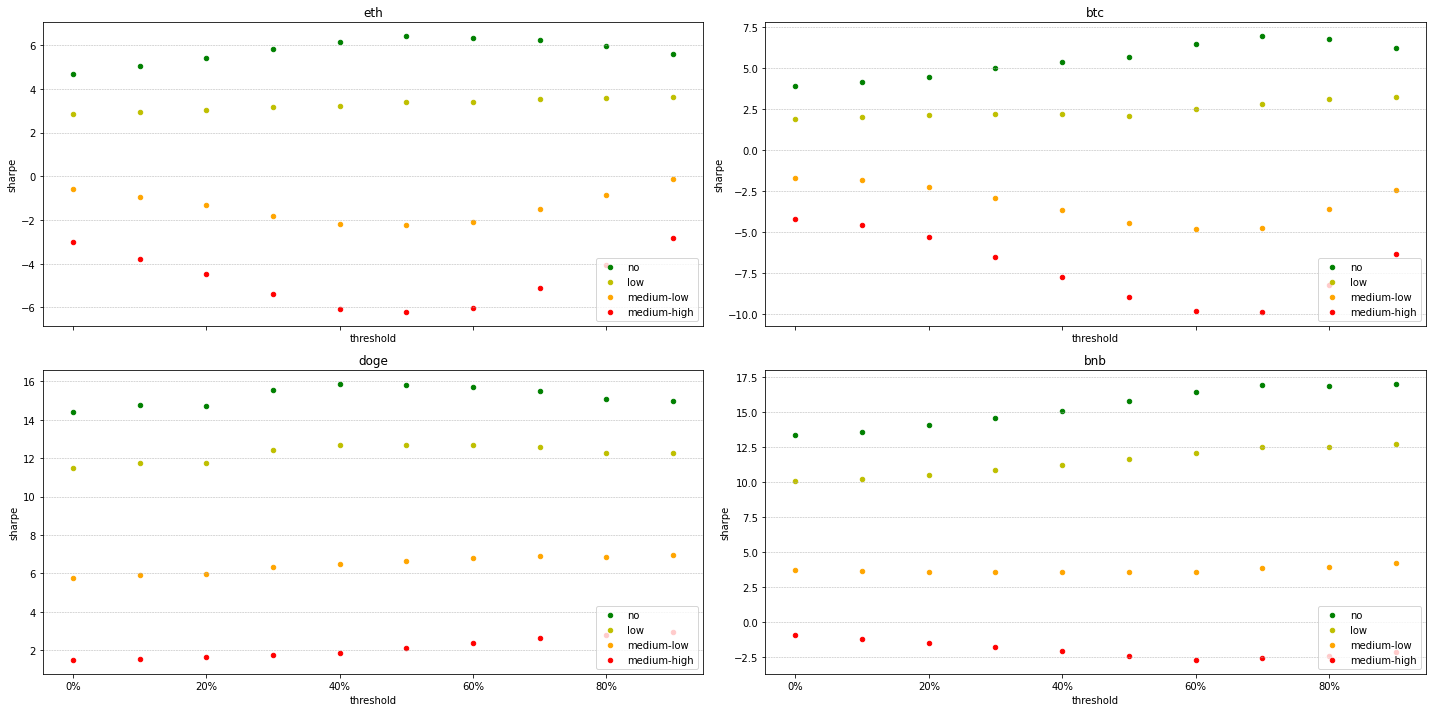

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex = True,
                                    figsize=(20, 10))

for j in range(0, len(threshold_lst)):
    axs[0,0].scatter(threshold_lst[j], results_all[j*4].loc[('eth', 'mean')]['ann_sharpe'], s=20, color='g')
    axs[0,0].scatter(threshold_lst[j], results_all[j*4+1].loc[('eth', 'mean')]['ann_sharpe'], s=20, color='y')
    axs[0,0].scatter(threshold_lst[j], results_all[j*4+2].loc[('eth', 'mean')]['ann_sharpe'], s=20, color='orange')
    axs[0,0].scatter(threshold_lst[j], results_all[j*4+3].loc[('eth', 'mean')]['ann_sharpe'], s=20, color='red')

    axs[0,0].set_ylabel('sharpe')

    vals = axs[0,0].get_xticks()
    axs[0,0].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    axs[0,0].set_xlabel('threshold')

    axs[0,0].legend(string, loc='lower right')
    
    axs[0,0].set_title('eth')

    axs[0,0].grid(axis='y', linestyle='--', linewidth=.5)
    
for j in range(0, len(threshold_lst)):
    axs[0,1].scatter(threshold_lst[j], results_all[j*4].loc[('btc', 'mean')]['ann_sharpe'], s=20, color='g')
    axs[0,1].scatter(threshold_lst[j], results_all[j*4+1].loc[('btc', 'mean')]['ann_sharpe'], s=20, color='y')
    axs[0,1].scatter(threshold_lst[j], results_all[j*4+2].loc[('btc', 'mean')]['ann_sharpe'], s=20, color='orange')
    axs[0,1].scatter(threshold_lst[j], results_all[j*4+3].loc[('btc', 'mean')]['ann_sharpe'], s=20, color='red')

    axs[0,1].set_ylabel('sharpe')

    vals = axs[0,1].get_xticks()
    axs[0,1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    axs[0,1].set_xlabel('threshold')

    axs[0,1].legend(string, loc='lower right')
    
    axs[0,1].set_title('btc')

    axs[0,1].grid(axis='y', linestyle='--', linewidth=.5)

for j in range(0, len(threshold_lst)):
    axs[1,0].scatter(threshold_lst[j], results_all[j*4].loc[('doge', 'mean')]['ann_sharpe'], s=20, color='g')
    axs[1,0].scatter(threshold_lst[j], results_all[j*4+1].loc[('doge', 'mean')]['ann_sharpe'], s=20, color='y')
    axs[1,0].scatter(threshold_lst[j], results_all[j*4+2].loc[('doge', 'mean')]['ann_sharpe'], s=20, color='orange')
    axs[1,0].scatter(threshold_lst[j], results_all[j*4+3].loc[('doge', 'mean')]['ann_sharpe'], s=20, color='red')

    axs[1,0].set_ylabel('sharpe')

    vals = axs[1,0].get_xticks()
    axs[1,0].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    axs[1,0].set_xlabel('threshold')

    axs[1,0].legend(string, loc='lower right')
    
    axs[1,0].set_title('doge')

    axs[1,0].grid(axis='y', linestyle='--', linewidth=.5)

for j in range(0, len(threshold_lst)):
    axs[1,1].scatter(threshold_lst[j], results_all[j*4].loc[('bnb', 'mean')]['ann_sharpe'], s=20, color='g')
    axs[1,1].scatter(threshold_lst[j], results_all[j*4+1].loc[('bnb', 'mean')]['ann_sharpe'], s=20, color='y')
    axs[1,1].scatter(threshold_lst[j], results_all[j*4+2].loc[('bnb', 'mean')]['ann_sharpe'], s=20, color='orange')
    axs[1,1].scatter(threshold_lst[j], results_all[j*4+3].loc[('bnb', 'mean')]['ann_sharpe'], s=20, color='red')

    axs[1,1].set_ylabel('sharpe')

    vals = axs[1,1].get_xticks()
    axs[1,1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    axs[1,1].set_xlabel('threshold')

    axs[1,1].legend(string, loc='lower right')
    
    axs[1,1].set_title('bnb')

    axs[1,1].grid(axis='y', linestyle='--', linewidth=.5)

plt.savefig(f'figure_5.png')
    
plt.tight_layout()
plt.show()

## data retrieval

In [ ]:
symbol_lst = ['ETHUSDT', 'BTCUSDT', 'DOGEUSDT', 'BNBUSDT', 'ADAUSDT']
currencies_lst = ['eth', 'btc', 'doge', 'bnb', 'ada']

contract = 'PERPETUAL'
interval = '1h'


In [ ]:
for t in range(0, len(symbol_lst)):
    symbol = symbol_lst[t]
    currencies = currency_lst[t]
    %run binance_api.ipynb